# Credit Card Fraud Detection

**Objective**: In this project, we will predict fraudulent credit card transactions with the help of Machine learning models. From the bank’s perspective, this task is important to retain the trust of its high profit customers. It is necessary to minimize the probability of these financial losses to maintain the trust and credibility.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding the Data

In [2]:
df=pd.read_csv('creditcard.csv',na_values='Select') 

In [3]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

# Exploratory Data Analysis

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

Text(0.5, 1.0, 'Percentage of fraudulent vs non-fraudulent transactions')

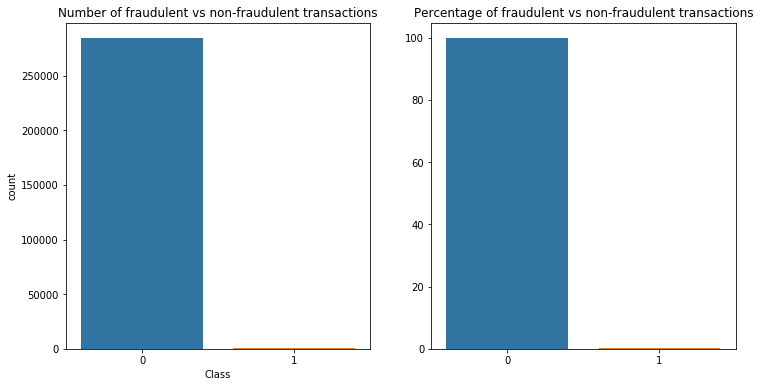

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(df['Class'])
plt.title('Number of fraudulent vs non-fraudulent transactions')
plt.subplot(1,2,2)
sns.barplot(x=[0,1],y=[normal_share,fraud_share])
plt.title('Percentage of fraudulent vs non-fraudulent transactions')

In [10]:
fraud_share

0.1727485630620034

We observe a huge class imbalance as there is only 0.173% of 1s, the transactions which are fraud.

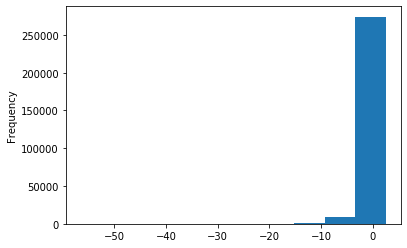

In [11]:
df['V1'].plot(kind='hist')

In [12]:
def my_hist(column):
    plt.figure(figsize=(15,4))
    i=1
    for col in column:
        plt.subplot(1,len(column),i)
        sns.distplot(df[col], color='g')
        plt.title(col)
        i+=1
    plt.tight_layout()
    plt.show()

In [13]:
col1 = ['V1','V2','V3','V4']
col2 = ['V5','V6','V7','V8']
col3 = ['V9','V10','V11','V12']
col4 = ['V13','V14','V15','V16']
col5 = ['V17','V18','V19','V20']
col6 = ['V21','V22','V23','V24']
col7 = ['V25','V26','V27','V28']
col8 = ['Class','Amount','Time']

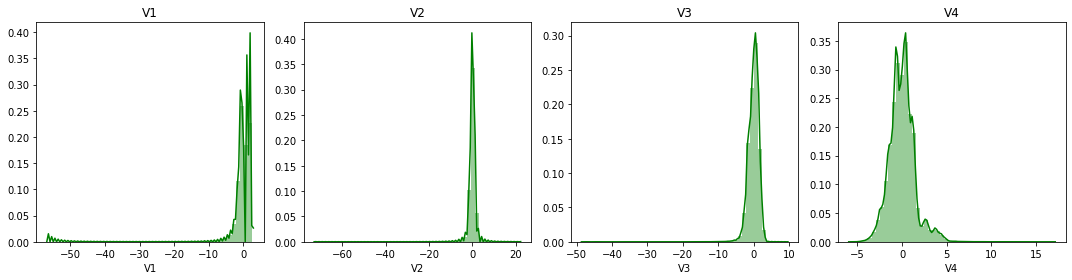

In [14]:
my_hist(col1)

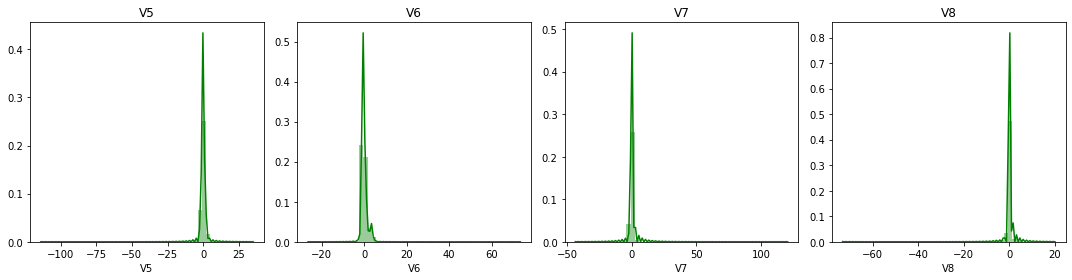

In [15]:
my_hist(col2)

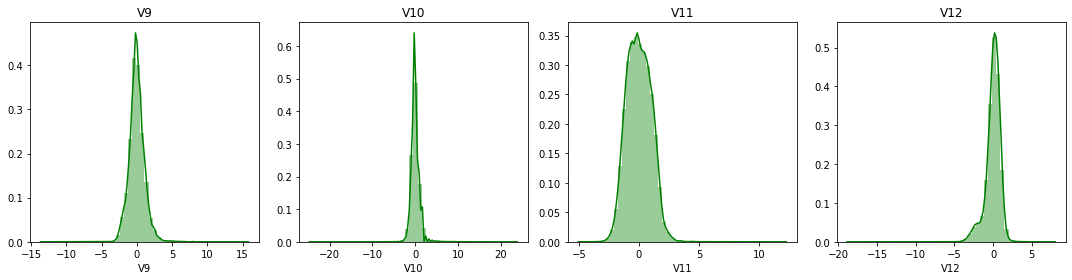

In [16]:
my_hist(col3)

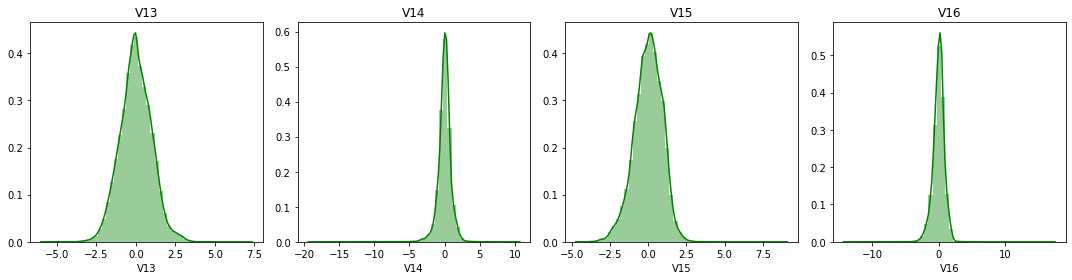

In [17]:
my_hist(col4)

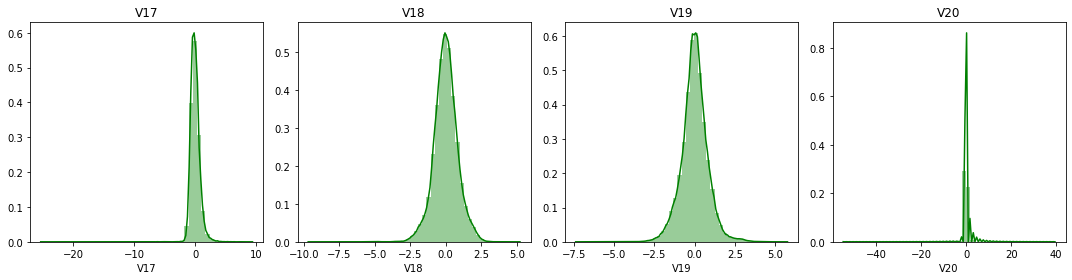

In [18]:
my_hist(col5)

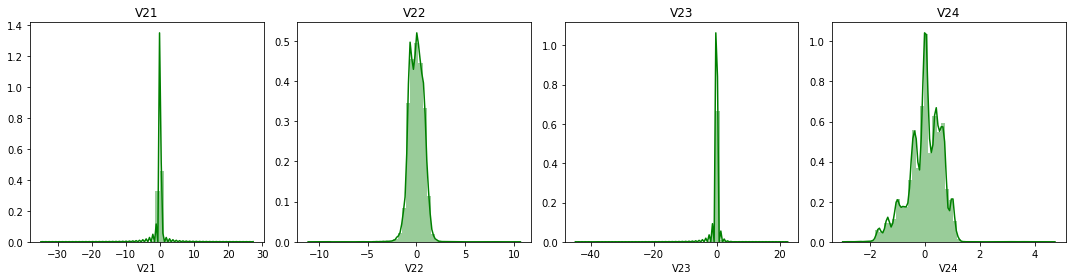

In [19]:
my_hist(col6)

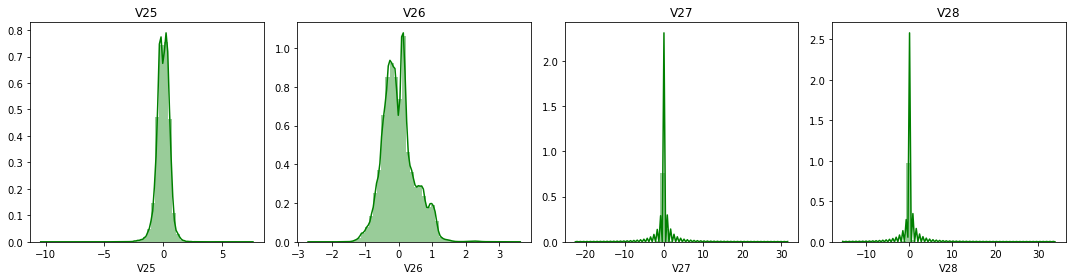

In [20]:
my_hist(col7)

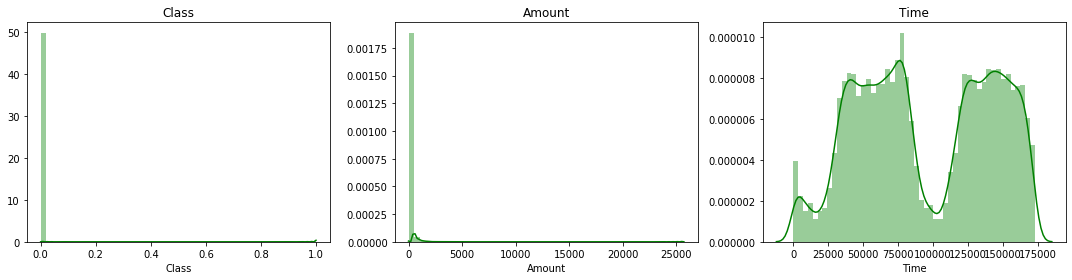

In [21]:
my_hist(col8)

Therefore, we observe some degree of skewness in these variables. Since skewness implies presence of outliers and may affect the assumptions of our model, we will treat the skewness later on.
<br>
<br>
The skewed variables are:
- V20
- V21
- V22
- V24
- V25

In [22]:
skv=['V20','V21','V22','V24','V25']

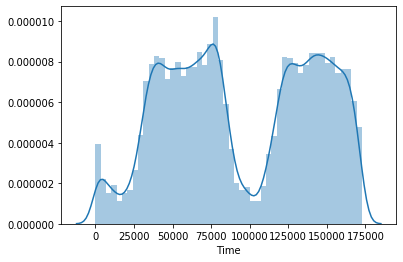

In [23]:
sns.distplot(df['Time'])

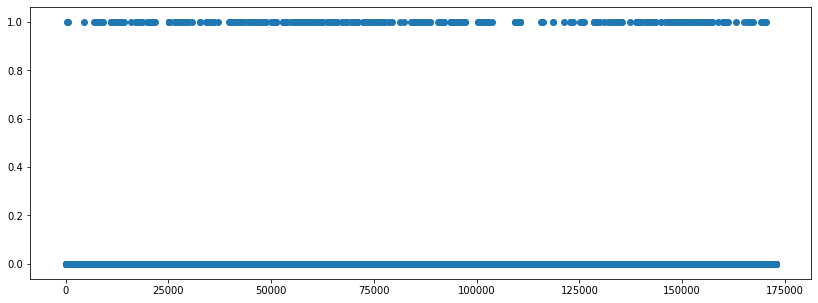

In [24]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(14,5))
plt.scatter(x='Time',y='Class',data=df)

We observe that Time does not play a major role for the prediction as the fraud cases are not there for the time where the number of transactions is extremely low. Therefore, we shall not use the time variable for model predictions. 

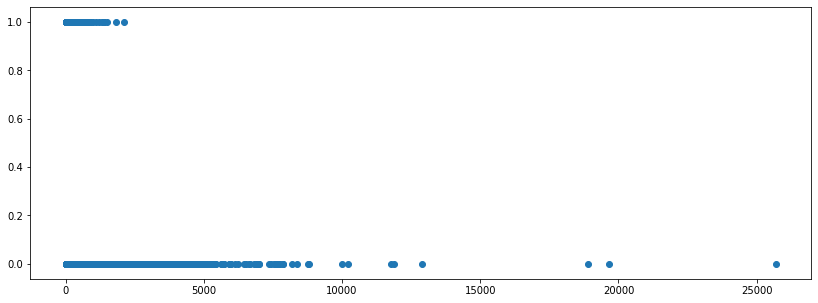

In [25]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(14,5))
plt.scatter(x='Amount',y='Class',data=df)

The fraud cases are in a range of amount between 0 and 2500.

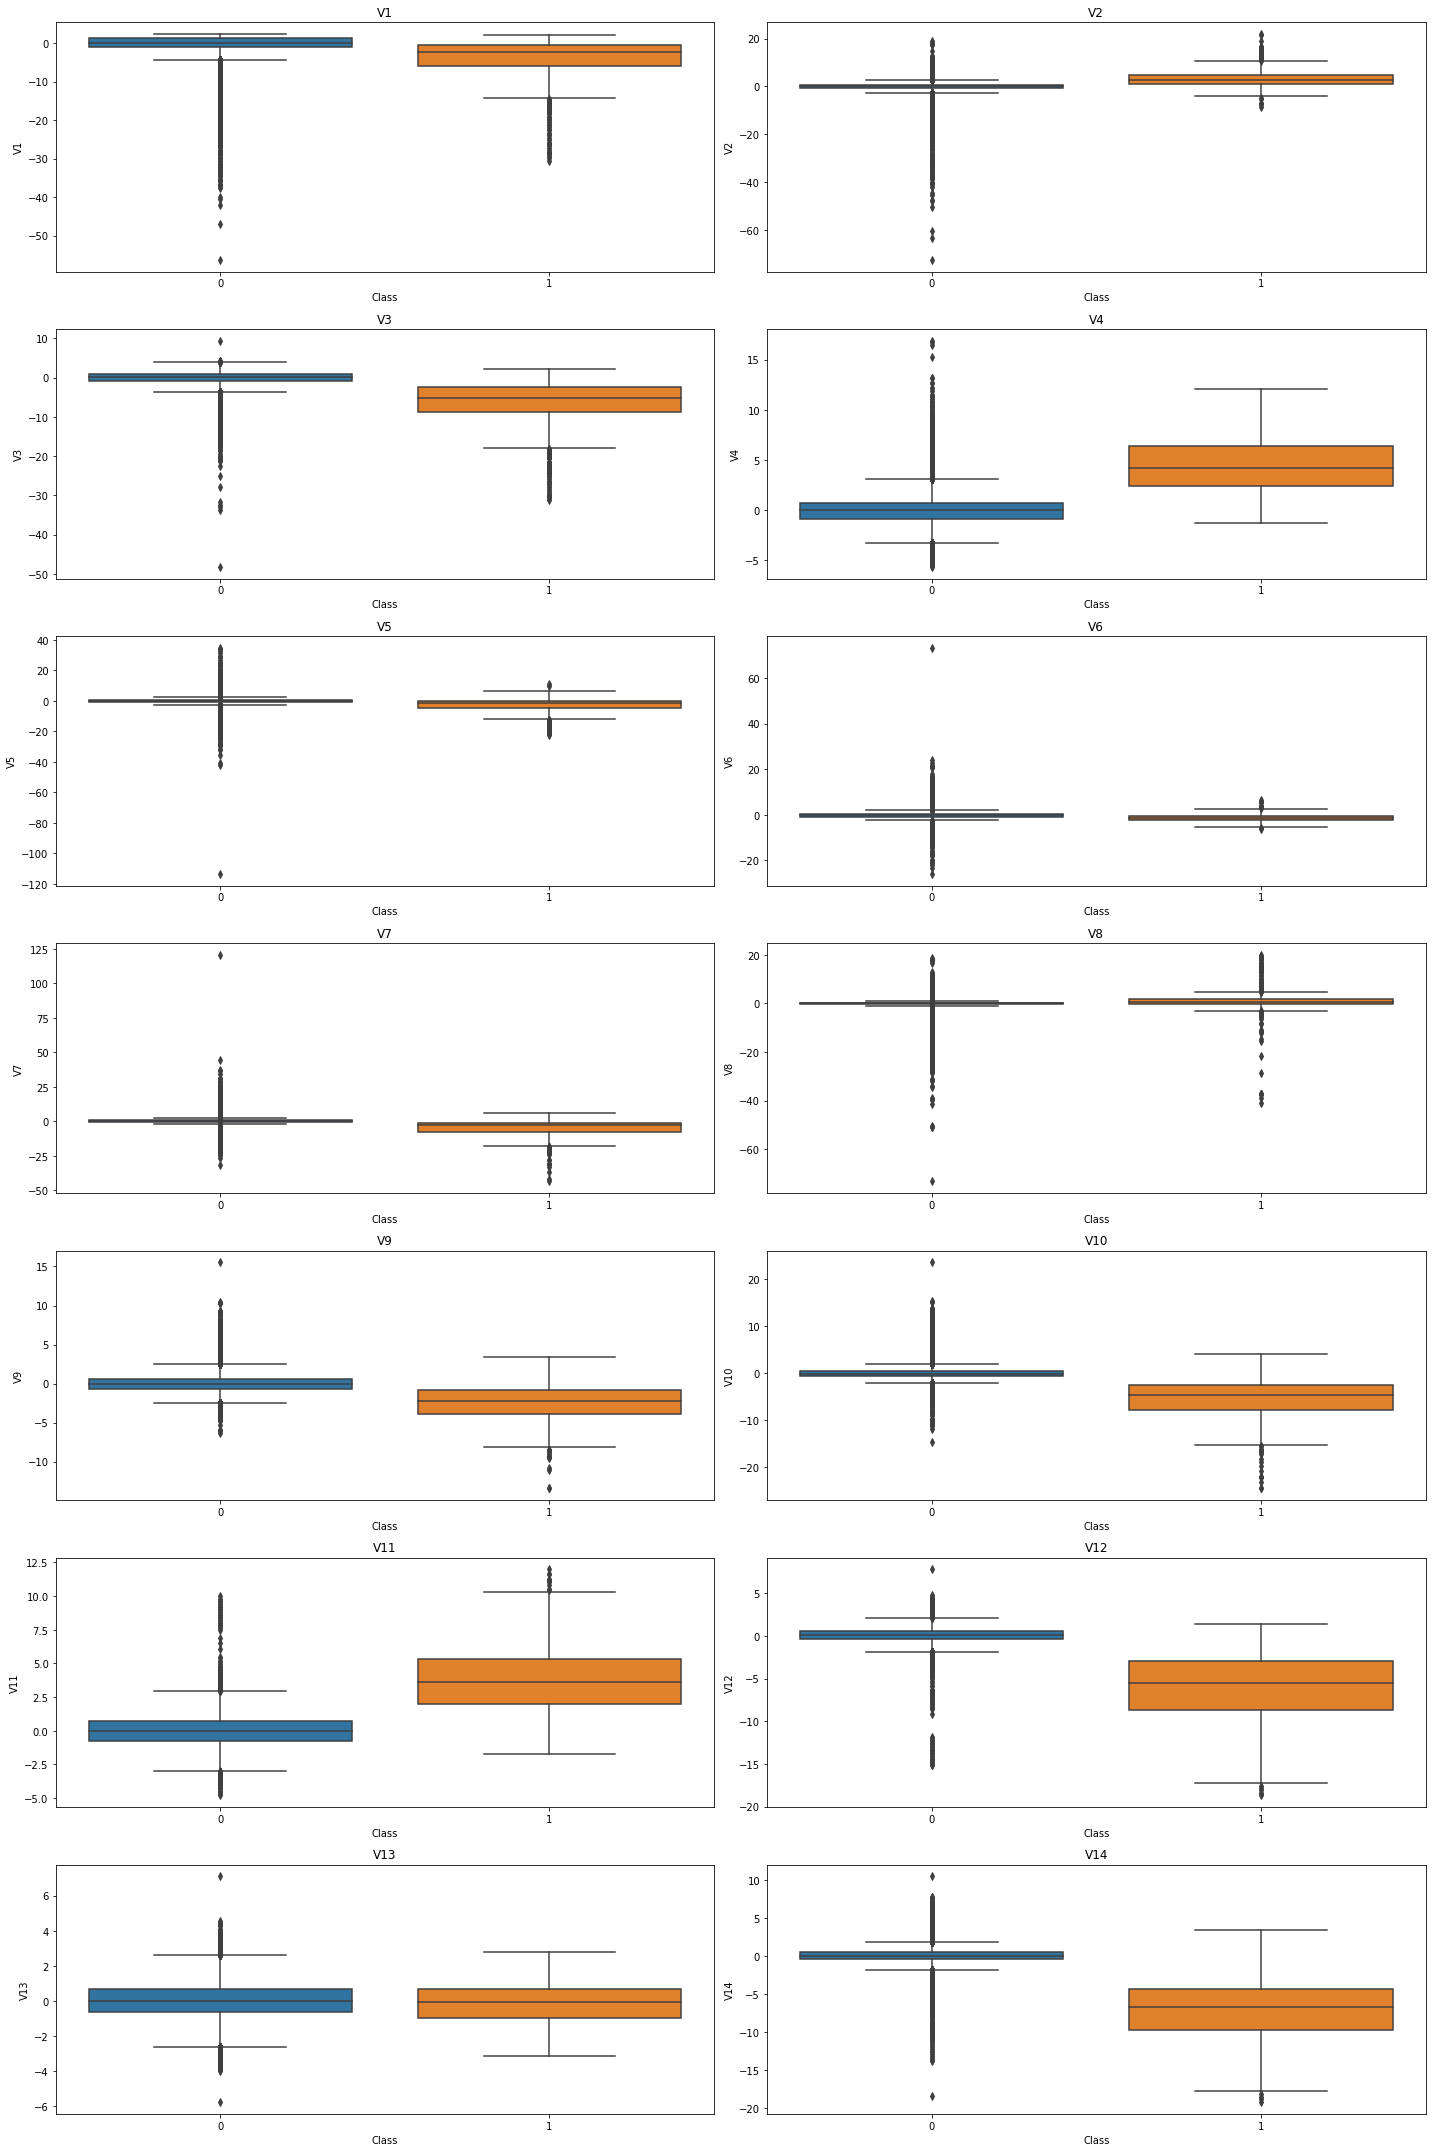

In [26]:
i=1
plt.figure(figsize=(20,30))
for j in range(1,15):
    plt.subplot(7,2,i)
    col="V"+str(j)
    sns.boxplot(x='Class',y=col,data=df)
    plt.title(col)
    i+=1
plt.tight_layout()
plt.show()

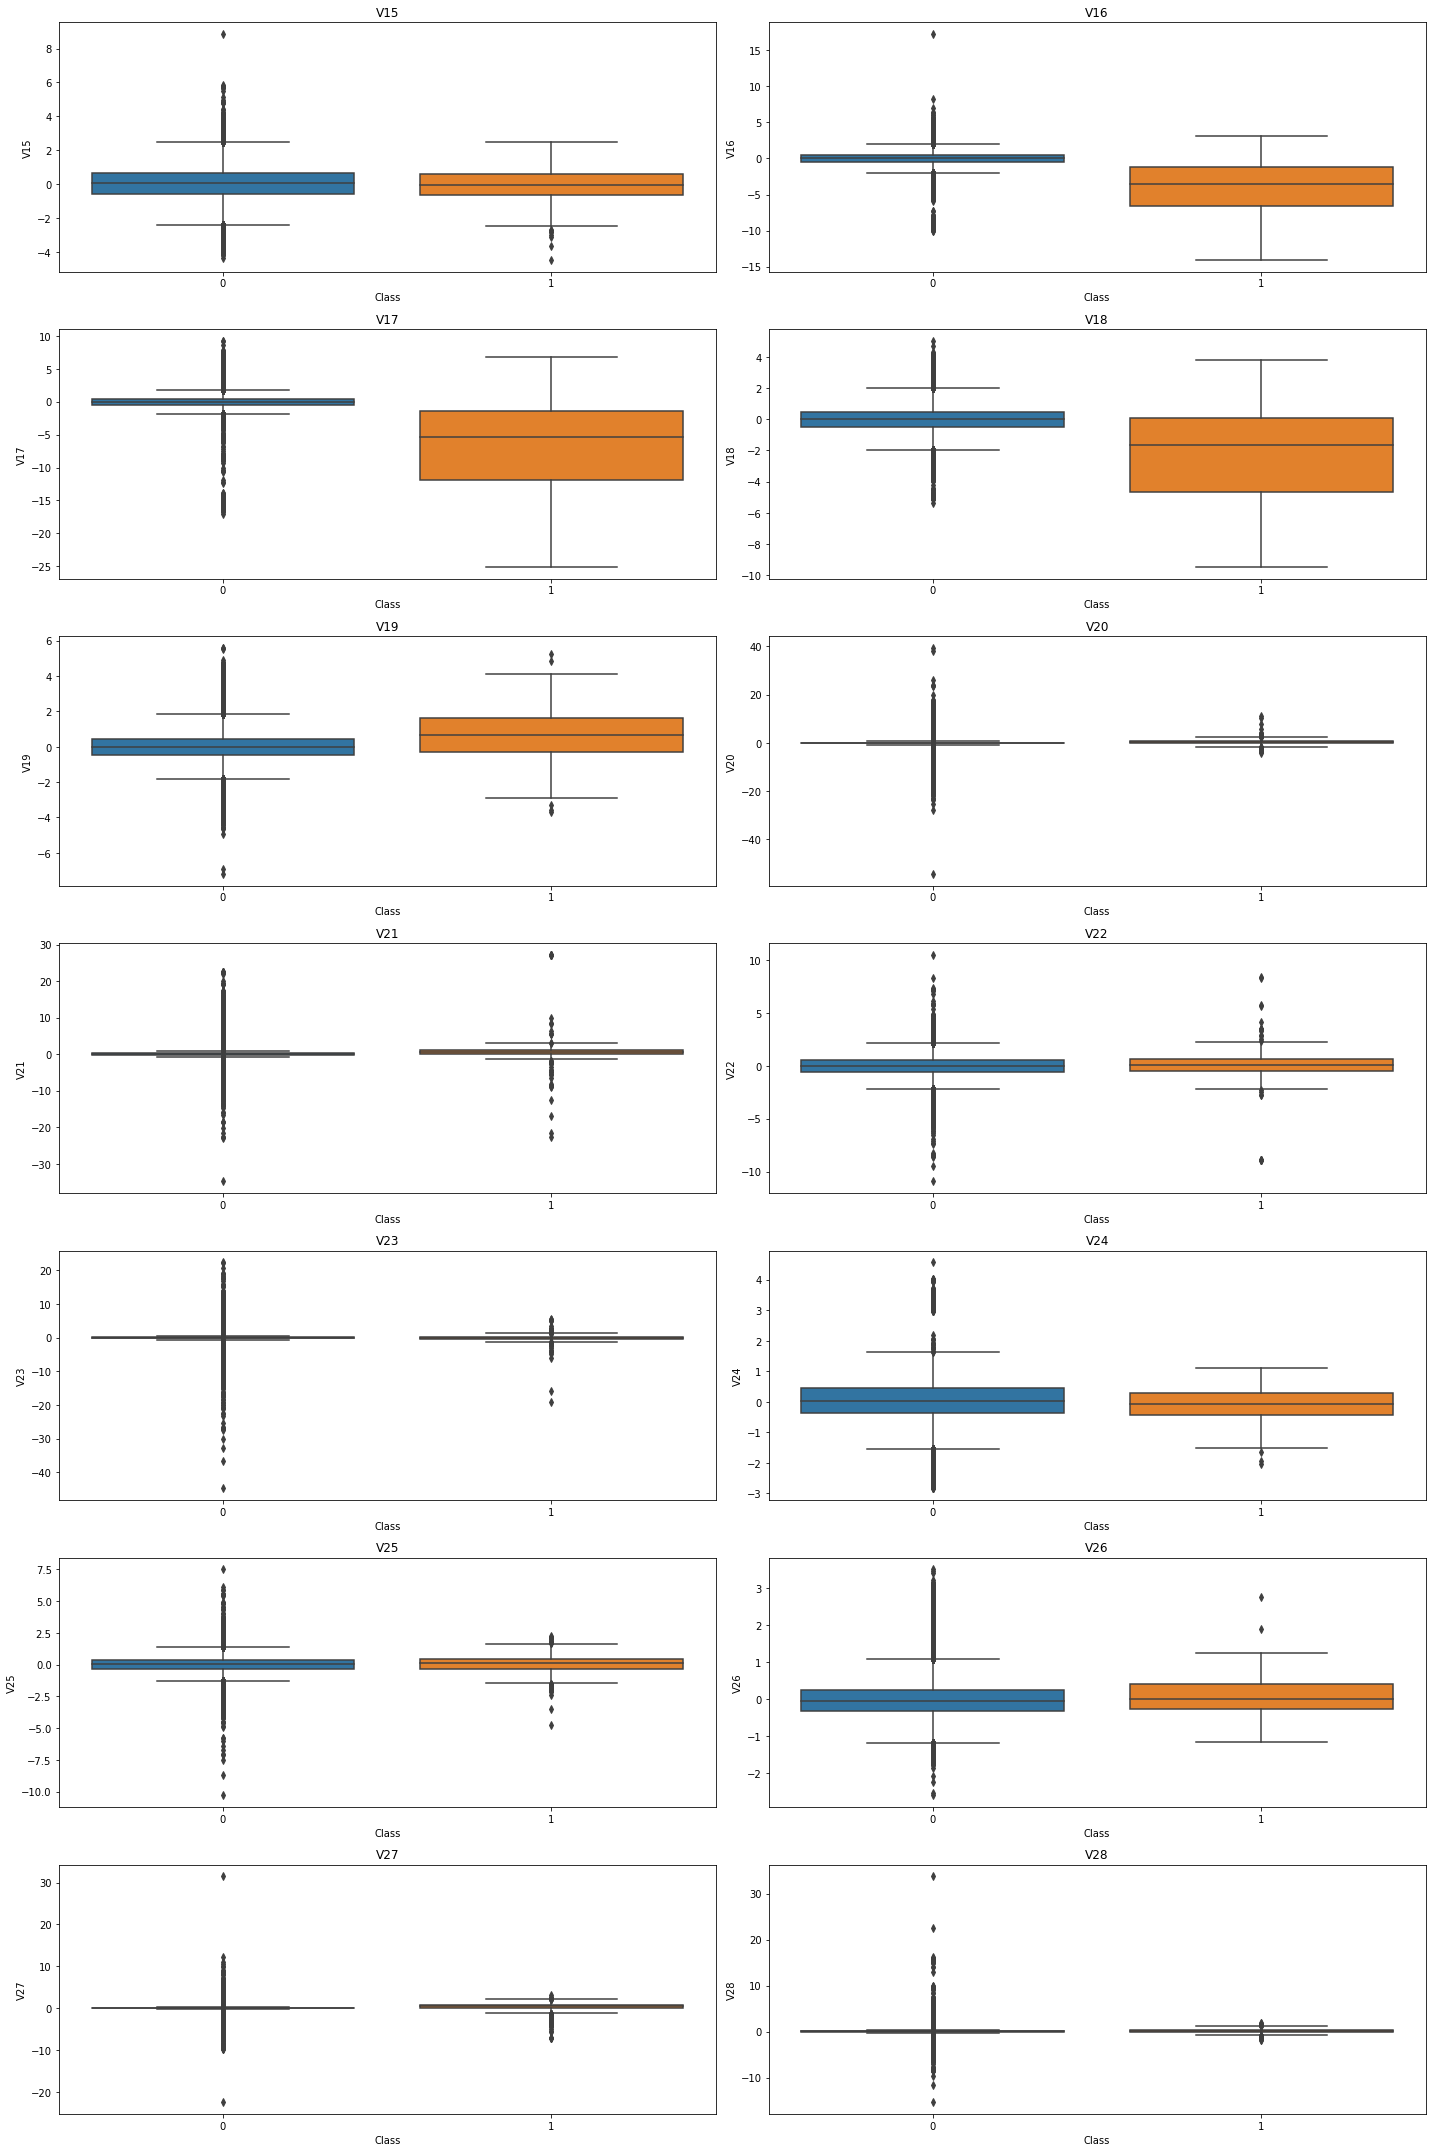

In [27]:
i=1
plt.figure(figsize=(20,30))
for j in range(15,29):
    plt.subplot(7,2,i)
    col="V"+str(j)
    sns.boxplot(x='Class',y=col,data=df)
    plt.title(col)
    i+=1
plt.tight_layout()
plt.show()

Therefore, we observe that there is a difference in values of the predictor variables resulting in different class prediction. For example, there is higher probability for the transaction to be fraud for higher values of V11.

# Model Building

## Data Preparation

In [28]:
X=df.drop(['Time','Class'],axis=1) #we drop the time variable
y=df['Class']

### Splitting Data into Training and Test Set

In [29]:
#train-test-split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,stratify=y,random_state=100) 

#we use stratify to get similar distribution in training and test sets

In [30]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


Out of the 492 fraud cases in the data, 344 are in training set and 148 are in test set. The value 148 is a good sample size for evaluating the model.

### Removing skewness to make the distribution more Gaussian

In [31]:
from sklearn.preprocessing import PowerTransformer

for v in skv:
    t=PowerTransformer(copy=False)
    X_train[v]=t.fit_transform(X_train[v].values.reshape(-1,1))
    X_test[v]=t.transform(X_test[v].values.reshape(-1,1))

In [32]:
len(skv)

5

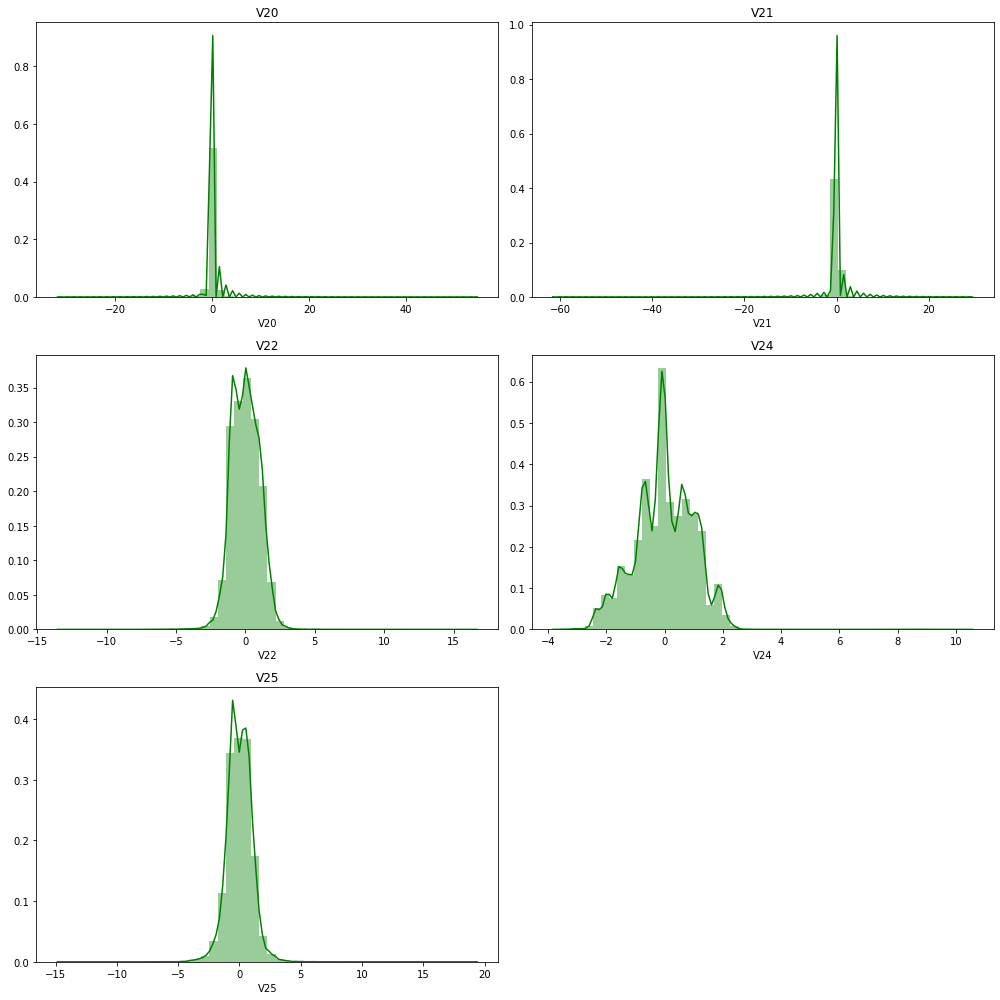

In [33]:
i=1
plt.figure(figsize=(14,14))
for v in skv:
    plt.subplot(3,2,i)
    sns.distplot(X_train[v],color='g')
    plt.title(v)
    i+=1
    
plt.tight_layout()
plt.show()

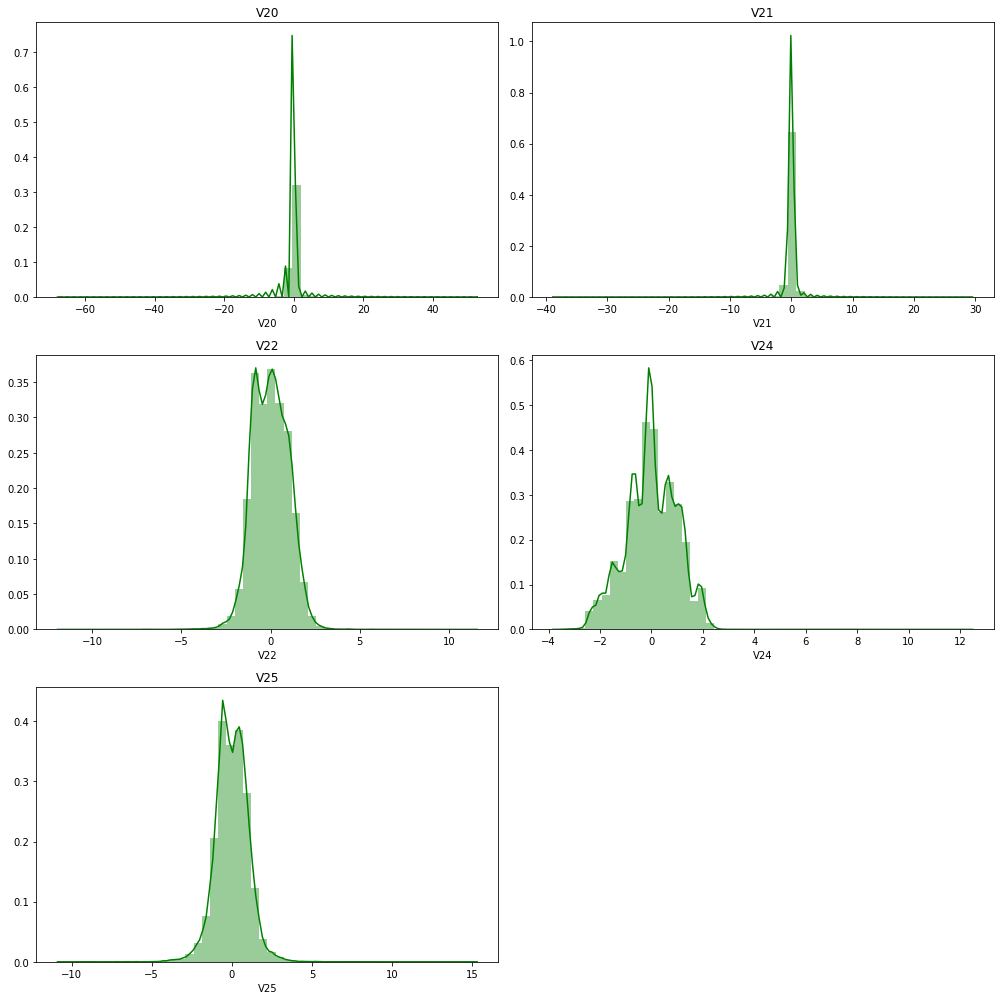

In [34]:
i=1
plt.figure(figsize=(14,14))
for v in skv:
    plt.subplot(3,2,i)
    sns.distplot(X_test[v],color='g')
    plt.title(v)
    i+=1
    
plt.tight_layout()
plt.show()

Our data is now prepared for model building.
<br>
<br>
***Approach***: We build our model first on the original imbalanced dataset, and then try different balancing technqiues to deal with the class imbalance. We try various different classification models and then choose the best one. 
<br>
<br>
For hyperparameter tuning, we first tune the model with hyperparameters of wider range. We then narrow down the ranges to find the optimal hyperparameters for the model.

## Model Building on Imbalanced Dataset

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [41]:
#L1 regularized

logistic=LogisticRegression(penalty='l1',solver='liblinear')

# Create regularization hyperparameter list
C = [0.001,0.01,0.1,0.2,0.5,1,2,4,8]

# Create hyperparameter options
hyperparameters = dict(C=C)

We choose cv=3 so that at least 100 1s are present in the cross validation sets.

In [62]:
lr1 = GridSearchCV(logistic, hyperparameters, cv=3, verbose=5,n_jobs=-1,scoring='roc_auc',return_train_score=True)
lr1.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:   46.8s remaining:   23.4s
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:  1.0min remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 0.5, 1, 2, 4, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=5)

In [63]:
#scores of GridSearchCV
scores = pd.DataFrame(lr1.cv_results_)

In [64]:
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.725375,0.247350,0.103392,0.002487,0.001,{'C': 0.001},0.864922,0.853986,0.795023,0.837977,0.030699,9,0.824714,0.841506,0.851606,0.839275,0.011091
1,2.960083,0.202845,0.059507,0.002487,0.01,{'C': 0.01},0.961671,0.989266,0.977225,0.976054,0.011296,8,0.981662,0.973645,0.976278,0.977195,0.003337
2,10.195732,2.852899,0.073470,0.007389,0.1,{'C': 0.1},0.973650,0.987419,0.985347,0.982138,0.006062,1,0.986149,0.986587,0.985017,0.985918,0.000661
3,16.536112,3.160565,0.104718,0.025853,0.2,{'C': 0.2},0.974036,0.985655,0.983040,0.980910,0.004977,2,0.986308,0.986144,0.985698,0.986050,0.000258
4,25.251469,4.771868,0.067486,0.001245,0.5,{'C': 0.5},0.971237,0.983672,0.979546,0.978152,0.005172,3,0.985203,0.985347,0.985039,0.985196,0.000126


In [65]:
lr1.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

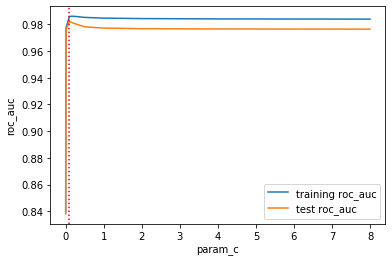

In [67]:
# plotting roc_auc_score with value of param_C for l1 regularization
plt.figure()
plt.plot(scores["param_C"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_C"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("param_c")
plt.ylabel("roc_auc")
plt.axvline(x=0.1,color='r',ls='dotted')
plt.legend()
plt.show()

Therefore, we find the best results for param_c=0.1.

In [36]:
lr1f=LogisticRegression(penalty='l1',C=0.1,solver='liblinear')
lr1f.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_train_prob=lr1f.predict_proba(X_train)[:,1]

In [38]:
lr1_df=pd.DataFrame()
lr1_df['Fraud']=y_train
lr1_df['Fraud_prob']=y_train_prob

In [39]:
from sklearn import metrics

In [40]:
#function to plot roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

### ROC Curve

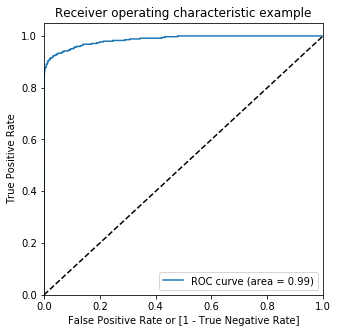

In [41]:
draw_roc(lr1_df.Fraud, lr1_df.Fraud_prob)

In [42]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    lr1_df[i]= lr1_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
lr1_df.head()

,Fraud,Fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
222925,0,0.000235,1,0,0,0,0,0,0,0,0,0
163811,0,0.000329,1,0,0,0,0,0,0,0,0,0
196038,0,0.000220,1,0,0,0,0,0,0,0,0,0
25173,0,0.000113,1,0,0,0,0,0,0,0,0,0
253792,0,0.001166,1,0,0,0,0,0,0,0,0,0


In [43]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(lr1_df.Fraud, lr1_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

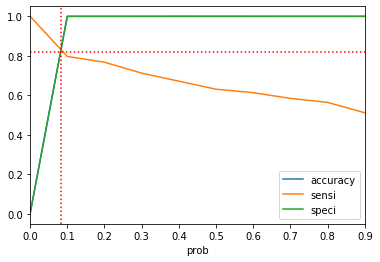

In [44]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.082,color='r',ls='dotted')
plt.axhline(y=0.82,color='r',ls='dotted')
plt.show()

In [45]:
#precision recall curve
from sklearn.metrics import precision_recall_curve

In [46]:
p, r, thresholds = precision_recall_curve(lr1_df.Fraud, lr1_df.Fraud_prob)

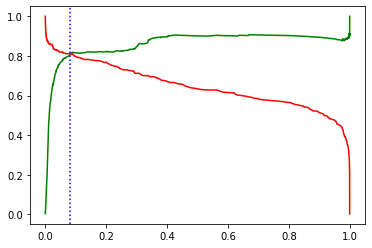

In [47]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.08,color='b',ls='dotted')
plt.show()

Therefore, we choose the threshold value as 0.08 so that we have equal balance of Precision and Recall.

In [48]:
lr1_df['Final_Pred']=lr1_df.Fraud_prob.map( lambda x: 1 if x > 0.08 else 0)

In [49]:
cmf=metrics.confusion_matrix(lr1_df['Fraud'],lr1_df['Final_Pred'])

In [50]:
cmf

array([[198952,     68],
       [    65,    279]], dtype=int64)

In [51]:
tr_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

In [52]:
tr_sp

0.9996583257964023

### Predicting on Test Set

In [53]:
#Creating a DataFrame of the original target variable and Fraud Probability 
y_test_pred=lr1f.predict_proba(X_test)[:,1]
y_test_pred_final = pd.DataFrame({'Fraud':y_test.values, 'Fraud_prob':y_test_pred})

In [54]:
y_test_pred_final['Final_Pred'] = y_test_pred_final.Fraud_prob.map(lambda x: 1 if x > 0.08 else 0)

In [55]:
cmf=metrics.confusion_matrix(y_test_pred_final['Fraud'],y_test_pred_final['Final_Pred'])

In [56]:
cmf

array([[85252,    43],
       [   33,   115]], dtype=int64)

In [57]:
te_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

In [58]:
te_sp

0.9994958672841315

In [59]:
mr=pd.DataFrame() #storing this dataframe to compare all the models

In [60]:
mr.loc['Logistic Regression-l1 regularized with no sampling','Training Accuracy']=metrics.accuracy_score(lr1_df.Fraud,lr1_df.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with no sampling','Test Accuracy']=metrics.accuracy_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with no sampling','Training Recall']=metrics.recall_score(lr1_df.Fraud,lr1_df.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with no sampling','Test Recall']=metrics.recall_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with no sampling','Training Precision']=metrics.precision_score(lr1_df.Fraud,lr1_df.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with no sampling','Test Precision']=metrics.precision_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with no sampling','Training Specificity']=tr_sp
mr.loc['Logistic Regression-l1 regularized with no sampling','Test Specificity']=te_sp
mr.loc['Logistic Regression-l1 regularized with no sampling','Training f1_score']=metrics.f1_score(lr1_df.Fraud,lr1_df.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with no sampling','Test f1_score']=metrics.f1_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)

In [61]:
mr

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision,Training Specificity,Test Specificity,Training f1_score,Test f1_score
Logistic Regression-l1 regularized with no sampling,0.999333,0.999111,0.811047,0.777027,0.804035,0.727848,0.999658,0.999496,0.807525,0.751634


## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

### Tuning max_depth

In [152]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 3)}

# instantiate the model
rf = RandomForestClassifier(random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:  1.1min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:  1.6min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:  2.0min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:  2.5min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  3.3min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  3.6min remaining:   43.6s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  4.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [153]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

In [154]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

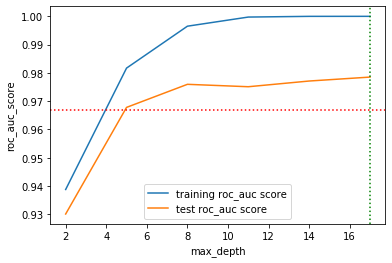

In [155]:
# plotting roc_auc score with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_depth")
plt.ylabel("roc_auc_score")
plt.axhline(y=0.967,color='r',ls='dotted')
plt.axvline(x=17,color='g',ls='dotted')
plt.legend()
plt.show()

Although the best estimator is for the model with max_depth=17, we observe lesser overfitting for values between 2 and 4.

In [123]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': [2,3,4]}

# instantiate the model
rf = RandomForestClassifier(random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:   36.7s remaining:  2.1min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   37.5s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   43.5s remaining:   54.4s
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:   43.6s remaining:   34.8s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:   44.4s remaining:   22.2s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:   51.9s remaining:   14.8s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [124]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

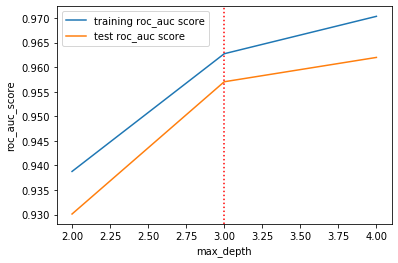

In [126]:
# plotting roc_auc score with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_depth")
plt.ylabel("roc_auc_score")
plt.axvline(x=3,color='r',ls='dotted')
plt.legend()
plt.show()

We observe minimal overfitting at max_depth=3.

### Tuning n_estimators

In [128]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=3,random_state=100) 


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:   47.2s remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:  3.5min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:  5.6min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  6.1min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  8.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                    

In [129]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

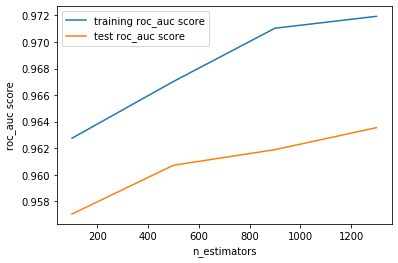

In [130]:
# plotting roc_auc with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("n_estimators")
plt.ylabel("roc_auc score")
plt.legend()
plt.show()

We observe the best results when n_estimators is 500.

In [131]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': [350,400,450,500]}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=3,random_state=100) 


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:  2.5min remaining:  7.6min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:  2.9min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:  3.2min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  4.4min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  4.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                    

In [132]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

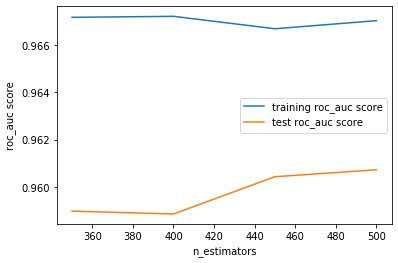

In [133]:
# plotting roc_auc with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("n_estimators")
plt.ylabel("roc_auc score")
plt.legend()
plt.show()

We observe that the best results are with n_estimators=500.

### Tuning max_features

In [134]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [4, 8, 12, 16, 20, 24, 28]}

# instantiate the model
rf = RandomForestClassifier(max_depth=3,random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:  2.1min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:  3.3min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:  4.1min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  18 out of  21 | elapsed:  5.1min remaining:   50.9s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  5.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  5.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                    

In [135]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

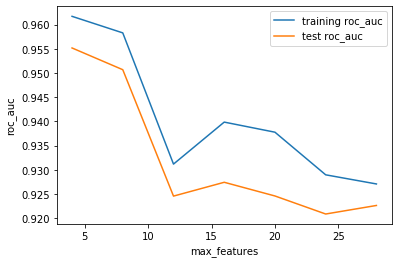

In [136]:
# plotting roc_auc with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("max_features")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

In [137]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [3,4,5,6]}

# instantiate the model
rf = RandomForestClassifier(max_depth=3,random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:   30.0s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:   36.1s remaining:   50.6s
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:   43.4s remaining:   31.0s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  1.0min remaining:   20.3s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                    

In [138]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

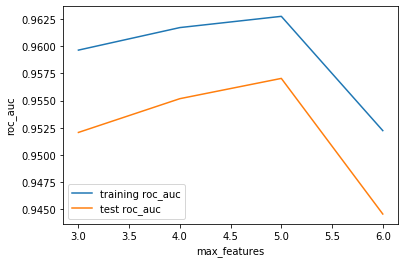

In [139]:
# plotting roc_auc with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("max_features")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal results are observed when max_features=5.

### Tuning min_samples_leaf

In [140]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=3,random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:  1.2min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed:  1.2min remaining:   44.9s
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:  1.8min remaining:   36.0s
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed:  1.8min remaining:   15.7s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                    

In [141]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

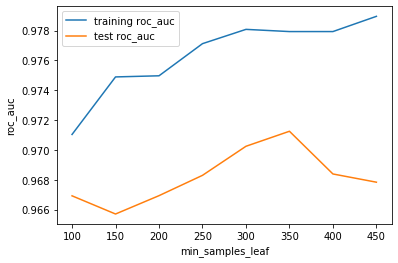

In [142]:
# plotting roc_auc with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_leaf")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

We observe minimal overfitting with min_samples_leaf=100.

In [143]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': [20,40,60,80]}

# instantiate the model
rf = RandomForestClassifier(max_depth=3,random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:   39.0s remaining:  2.0min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:   39.4s remaining:   55.2s
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:   39.6s remaining:   28.3s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  1.1min remaining:   21.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                    

In [144]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

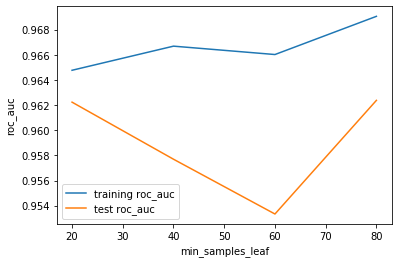

In [145]:
# plotting roc_auc with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_leaf")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Minimal overfitting is observed with 20 minimum samples required.

In [146]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': [5,10,15,20,25]}

# instantiate the model
rf = RandomForestClassifier(max_depth=3,random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:   40.7s remaining:  4.4min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:   41.5s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:   41.9s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   43.2s remaining:   37.8s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  1.3min remaining:   38.9s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  1.3min remaining:   19.5s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                    

In [147]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

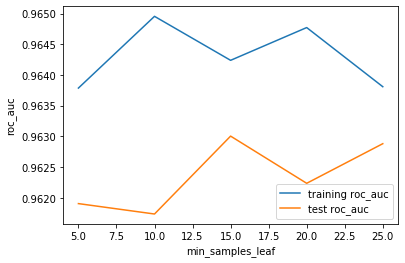

In [148]:
# plotting roc_auc with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_leaf")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal results are with min_samples_leaf=25.

### Tuning min_samples_split

In [149]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=3,random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:  1.2min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed:  1.3min remaining:   45.3s
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:  1.8min remaining:   36.1s
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed:  1.8min remaining:   15.7s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                    

In [150]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

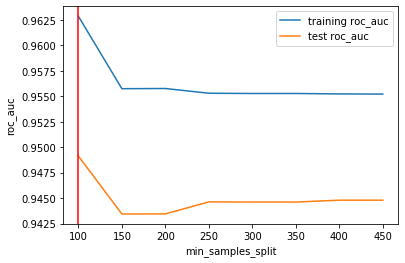

In [151]:
# plotting roc_auc with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.axvline(x=100,color='r')
plt.legend()
plt.show()

In [152]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': [20,40,60,80,100]}

# instantiate the model
rf = RandomForestClassifier(max_depth=3,random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:   47.0s remaining:  5.1min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:   47.5s remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:   48.8s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   50.7s remaining:   44.4s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  1.4min remaining:   42.9s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  1.5min remaining:   21.7s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                    

In [153]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

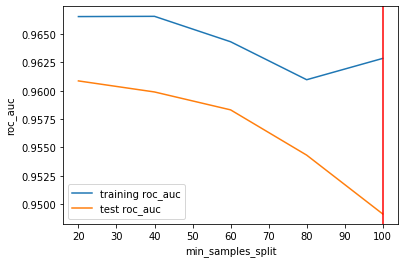

In [154]:
# plotting roc_auc with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.axvline(x=100,color='r')
plt.legend()
plt.show()

In [155]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': [5,10,15,20,25]}

# instantiate the model
rf = RandomForestClassifier(max_depth=3,random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:   40.4s remaining:  4.4min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:   40.6s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:   41.0s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   41.7s remaining:   36.5s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  1.2min remaining:   37.0s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  1.2min remaining:   18.5s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                    

In [156]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

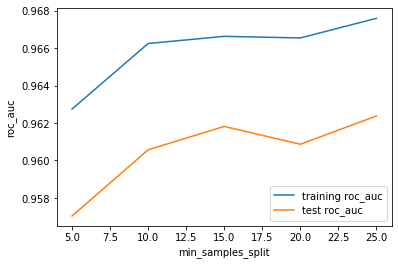

In [158]:
# plotting roc_auc with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

The optimal results are with min_samples_split=0.

### Grid Search to find optimal parameters

In [161]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_leaf': [20,25,30],
    'min_samples_split': [20,25,30], 
    'max_features': [4,5,6]
}
# Create a based model
rf = RandomForestClassifier(max_depth=3,n_estimators=500,random_state=100)
# Instantiate the grid search model
rf1 = GridSearchCV(estimator = rf, param_grid = param_grid,scoring='roc_auc',
                          cv = 3, n_jobs = -1,verbose = 10)

rf1.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done  75 out of  81 | elapsed: 31.2min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 33.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=None,
                                              oob_score=False, random_state=100,
                                    

In [162]:
# printing the optimal recall score and hyperparameters
print('We can get best roc_auc of',rf1.best_score_,'using',rf1.best_params_)

We can get best roc_auc of 0.9645573874532886 using {'max_features': 6, 'min_samples_leaf': 20, 'min_samples_split': 20}


In [63]:
rf1=RandomForestClassifier(max_depth=3,max_features=6,min_samples_leaf=20,min_samples_split=20,n_estimators=500,random_state=100)
rf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [64]:
y_train_prob=rf1.predict_proba(X_train)[:,1]

In [65]:
rf1_df=pd.DataFrame()
rf1_df['Fraud']=y_train
rf1_df['Fraud_prob']=y_train_prob

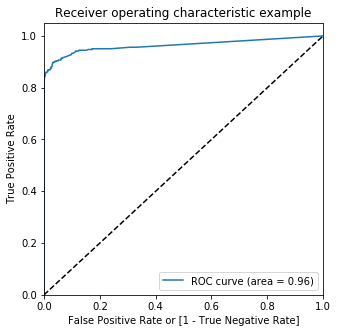

In [66]:
draw_roc(rf1_df.Fraud, rf1_df.Fraud_prob)

In [67]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    rf1_df[i]= rf1_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
rf1_df.head()

,Fraud,Fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
222925,0,0.000405,1,0,0,0,0,0,0,0,0,0
163811,0,0.000409,1,0,0,0,0,0,0,0,0,0
196038,0,0.000405,1,0,0,0,0,0,0,0,0,0
25173,0,0.000405,1,0,0,0,0,0,0,0,0,0
253792,0,0.000412,1,0,0,0,0,0,0,0,0,0


In [68]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(rf1_df.Fraud, rf1_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

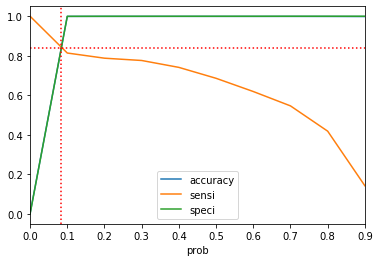

In [69]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.082,color='r',ls='dotted')
plt.axhline(y=0.84,color='r',ls='dotted')
plt.show()

In [70]:
p, r, thresholds = precision_recall_curve(rf1_df.Fraud, rf1_df.Fraud_prob)

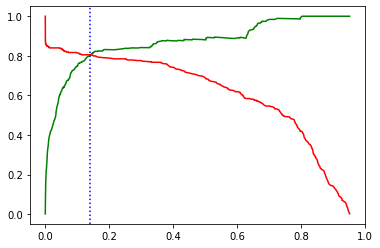

In [71]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.14,color='b',ls='dotted')
plt.show()

Therefore, we choose the threshold value as 0.14

In [72]:
rf1_df['Final_Pred']=rf1_df.Fraud_prob.map( lambda x: 1 if x > 0.14 else 0)

In [73]:
cmf=metrics.confusion_matrix(rf1_df['Fraud'],rf1_df['Final_Pred'])

In [74]:
cmf

array([[198951,     69],
       [    67,    277]], dtype=int64)

In [75]:
tr_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

### Prediction on Test Set

In [76]:
#Creating a DataFrame of the original target variable and Fraud Probability 
y_test_pred=rf1.predict_proba(X_test)[:,1]
y_test_pred_final = pd.DataFrame({'Fraud':y_test.values, 'Fraud_prob':y_test_pred})

In [77]:
y_test_pred_final['Final_Pred'] = y_test_pred_final.Fraud_prob.map(lambda x: 1 if x > 0.14 else 0)

In [78]:
cmf=metrics.confusion_matrix(y_test_pred_final['Fraud'],y_test_pred_final['Final_Pred'])

In [79]:
cmf

array([[85249,    46],
       [   35,   113]], dtype=int64)

In [80]:
te_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

In [81]:
mr.loc['Random Forest with no sampling','Training Accuracy']=metrics.accuracy_score(rf1_df.Fraud,rf1_df.Final_Pred)
mr.loc['Random Forest with no sampling','Test Accuracy']=metrics.accuracy_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Random Forest with no sampling','Training Recall']=metrics.recall_score(rf1_df.Fraud,rf1_df.Final_Pred)
mr.loc['Random Forest with no sampling','Test Recall']=metrics.recall_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Random Forest with no sampling','Training Precision']=metrics.precision_score(rf1_df.Fraud,rf1_df.Final_Pred)
mr.loc['Random Forest with no sampling','Test Precision']=metrics.precision_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Random Forest with no sampling','Training f1_score']=metrics.f1_score(rf1_df.Fraud,rf1_df.Final_Pred)
mr.loc['Random Forest with no sampling','Test f1_score']=metrics.f1_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Random Forest with no sampling','Training Specificity']=tr_sp
mr.loc['Random Forest with no sampling','Test Specificity']=te_sp

In [82]:
mr.head()

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision,Training Specificity,Test Specificity,Training f1_score,Test f1_score
Logistic Regression-l1 regularized with no sampling,0.999333,0.999111,0.811047,0.777027,0.804035,0.727848,0.999658,0.999496,0.807525,0.751634
Random Forest with no sampling,0.999318,0.999052,0.805233,0.763514,0.800578,0.710692,0.999653,0.999461,0.802899,0.736156


## Decision Tree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier

### Tuning max_depth

In [84]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 3)}

# instantiate the model
dt = DecisionTreeClassifier(random_state=100)


# fit tree on training data
dt = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
dt.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:   10.7s remaining:   28.1s
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:   12.6s remaining:   19.9s
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:   15.5s remaining:   15.5s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:   17.2s remaining:   10.9s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:   21.6s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   22.3s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   25.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 3)}, pre_dispatch='2*n_jobs',


In [203]:
scores=pd.DataFrame(dt.cv_results_)

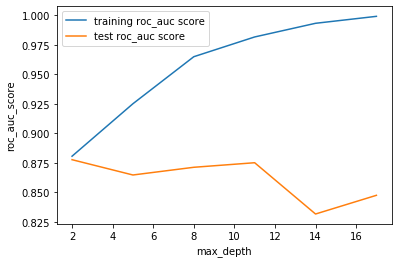

In [204]:
# plotting roc_auc score with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_depth")
plt.ylabel("roc_auc_score")
plt.legend()
plt.show()

Optimal value of max_depth is around 2. We check a narrower range.

In [208]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': [2,3,4]}

# instantiate the model
dt = DecisionTreeClassifier(random_state=100)


# fit tree on training data
dt = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
dt.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:    1.9s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:    2.3s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    2.7s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:    3.0s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    3.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    3.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    4.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1, param_grid={'max_depth': [2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=

In [209]:
scores=pd.DataFrame(dt.cv_results_)

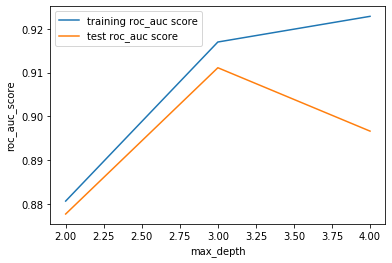

In [210]:
# plotting roc_auc score with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_depth")
plt.ylabel("roc_auc_score")
plt.legend()
plt.show()

Optimal value is around 3.

### Tuning min_samples_split

In [216]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': [50,100,150,200,250,300,350,400]}

# instantiate the model
dt = DecisionTreeClassifier(max_depth=3,random_state=100)


# fit tree on training data
dt = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
dt.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:    5.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed:    6.0s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:    8.1s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed:    8.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    8.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_samples_split': [50, 100, 150, 200, 250, 300, 350,
   

In [217]:
# scores of GridSearch CV
scores = pd.DataFrame(dt.cv_results_)

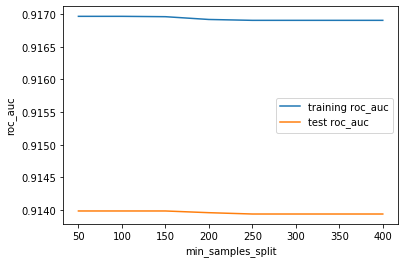

In [218]:
# plotting roc_auc with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal value for min_samples_split=50.

In [85]:
dt1=DecisionTreeClassifier(max_depth=3,min_samples_split=50,random_state=100)
dt1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [86]:
y_train_prob=dt1.predict_proba(X_train)[:,1]

In [87]:
dt1_df=pd.DataFrame()
dt1_df['Fraud']=y_train
dt1_df['Fraud_prob']=y_train_prob

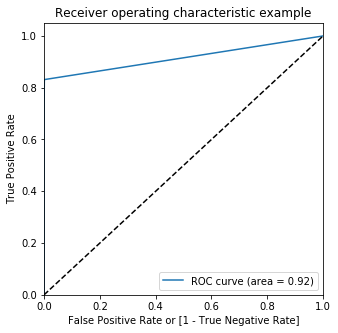

In [88]:
draw_roc(dt1_df.Fraud, dt1_df.Fraud_prob)

In [89]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    dt1_df[i]= dt1_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
dt1_df.head()

,Fraud,Fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
222925,0,0.000292,1,0,0,0,0,0,0,0,0,0
163811,0,0.000292,1,0,0,0,0,0,0,0,0,0
196038,0,0.000292,1,0,0,0,0,0,0,0,0,0
25173,0,0.000292,1,0,0,0,0,0,0,0,0,0
253792,0,0.000292,1,0,0,0,0,0,0,0,0,0


In [90]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(dt1_df.Fraud, dt1_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

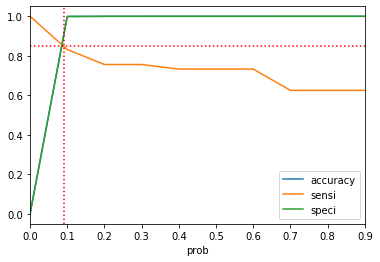

In [91]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.09,color='r',ls='dotted')
plt.axhline(y=0.85,color='r',ls='dotted')
plt.show()

In [92]:
p, r, thresholds = precision_recall_curve(dt1_df.Fraud, dt1_df.Fraud_prob)

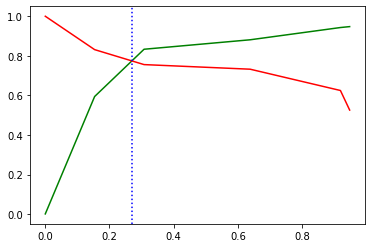

In [93]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.27,color='b',ls='dotted')
plt.show()

Optimal Threshold is chosen as 0.27

In [94]:
dt1_df['Final_Pred']=dt1_df.Fraud_prob.map( lambda x: 1 if x > 0.27 else 0)

In [95]:
cmf=metrics.confusion_matrix(dt1_df['Fraud'],dt1_df['Final_Pred'])

In [96]:
cmf

array([[198968,     52],
       [    84,    260]], dtype=int64)

In [97]:
tr_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

### Predicting on Test Set

In [98]:
#Creating a DataFrame of the original target variable and Fraud Probability 
y_test_pred=dt1.predict_proba(X_test)[:,1]
y_test_pred_final = pd.DataFrame({'Fraud':y_test.values, 'Fraud_prob':y_test_pred})

In [99]:
y_test_pred_final['Final_Pred'] = y_test_pred_final.Fraud_prob.map(lambda x: 1 if x > 0.27 else 0)

In [100]:
cmf=metrics.confusion_matrix(y_test_pred_final['Fraud'],y_test_pred_final['Final_Pred'])

In [101]:
cmf

array([[85255,    40],
       [   47,   101]], dtype=int64)

In [102]:
te_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

In [109]:
mr.loc['Decision Tree without Sampling','Training Accuracy']=metrics.accuracy_score(dt1_df.Fraud,dt1_df.Final_Pred)
mr.loc['Decision Tree without Sampling','Test Accuracy']=metrics.accuracy_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Decision Tree without Sampling','Training Recall']=metrics.recall_score(dt1_df.Fraud,dt1_df.Final_Pred)
mr.loc['Decision Tree without Sampling','Test Recall']=metrics.recall_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Decision Tree without Sampling','Training Precision']=metrics.precision_score(dt1_df.Fraud,dt1_df.Final_Pred)
mr.loc['Decision Tree without Sampling','Test Precision']=metrics.precision_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Decision Tree without Sampling','Training f1_score']=metrics.f1_score(dt1_df.Fraud,dt1_df.Final_Pred)
mr.loc['Decision Tree without Sampling','Test f1_score']=metrics.f1_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Decision Tree without Sampling','Training Specificity']=tr_sp
mr.loc['Decision Tree without Sampling','Test Specificity']=te_sp

In [110]:
mr

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision,Training Specificity,Test Specificity,Training f1_score,Test f1_score
Logistic Regression-l1 regularized with no sampling,0.999333,0.999111,0.811047,0.777027,0.804035,0.727848,0.999658,0.999496,0.807525,0.751634
Random Forest with no sampling,0.999318,0.999052,0.805233,0.763514,0.800578,0.710692,0.999653,0.999461,0.802899,0.736156
Decision Tree without Sampling,0.999318,0.998982,0.755814,0.682432,0.833333,0.716312,0.999739,0.999531,0.792683,0.698962


## XGBoost

In [105]:
import xgboost as xgb

In [106]:
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables

### Tuning max_depth

In [187]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 3)}

# instantiate the model
xgm = XGBClassifier(random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
xgm.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:  2.3min remaining:  5.9min
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:  2.9min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:  4.1min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:  4.3min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  5.2min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  5.5min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  5.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 3)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring='

In [188]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

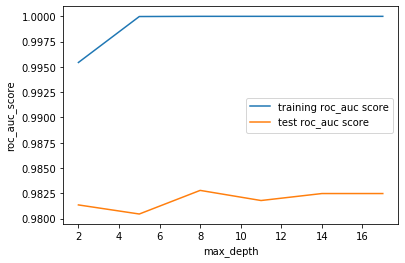

In [189]:
# plotting roc_auc score with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_depth")
plt.ylabel("roc_auc_score")
plt.legend()
plt.show()

We observe minimal overfitting with max_depth=2.

In [194]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': [2,3,4,5]}

# instantiate the model
xgm = XGBClassifier(random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
xgm.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:   58.2s remaining:  2.9min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:  1.3min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:  1.6min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  2.0min remaining:   40.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring='roc

In [195]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

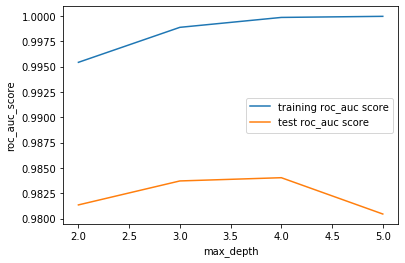

In [196]:
# plotting roc_auc score with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_depth")
plt.ylabel("roc_auc_score")
plt.legend()
plt.show()

Optimal results are found for either max_depth of value 3 or 4.

### Tuning n_estimators

In [197]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
xgm = XGBClassifier(max_depth=3,random_state=100) 


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
xgm.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:  1.4min remaining:  4.3min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:  6.6min remaining:  9.2min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed: 10.0min remaining:  7.1min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed: 10.6min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 14.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': range(100, 1500, 400)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,


In [199]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

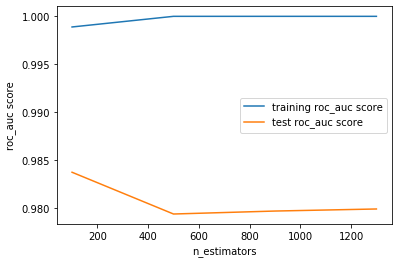

In [200]:
# plotting roc_auc with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("n_estimators")
plt.ylabel("roc_auc score")
plt.legend()
plt.show()

In [201]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': [80,90,100]}

# instantiate the model (note we are specifying a max_depth)
xgm = XGBClassifier(max_depth=3,random_state=100) 


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
xgm.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:  1.2min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  1.3min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  1.4min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:  1.4min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  1.4min remaining:   43.0s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  1.5min remaining:   25.3s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': [80, 90, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
        

In [202]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

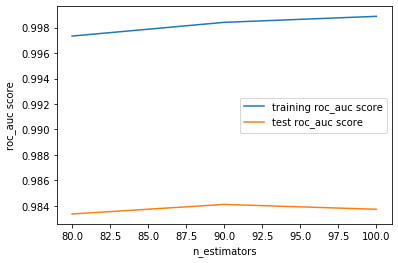

In [203]:
# plotting roc_auc with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("n_estimators")
plt.ylabel("roc_auc score")
plt.legend()
plt.show()

Optimal results are with n_estimators=90.

In [44]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': [100,110,120]}

# instantiate the model (note we are specifying a max_depth)
xgm = XGBClassifier(max_depth=3,random_state=100) 


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
xgm.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:  1.6min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  1.6min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  1.7min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:  1.7min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  1.7min remaining:   51.0s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  1.7min remaining:   29.5s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': [100, 110, 120]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
      

In [45]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

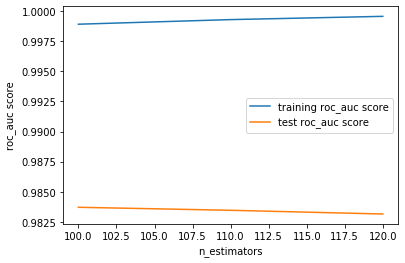

In [46]:
# plotting roc_auc with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("n_estimators")
plt.ylabel("roc_auc score")
plt.legend()
plt.show()

Again, the best results are observed with n_estimators=100.

### Tuning min_child_weight

In [60]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_child_weight': [1,4,7,10,13]}

# instantiate the model
xgm = XGBClassifier(max_depth=3,random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  1.3min remaining:  8.3min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  1.3min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  1.3min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  1.3min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  2.3min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  2.4min remaining:   35.2s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_child_weight': [1, 4, 7, 10, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,


In [61]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

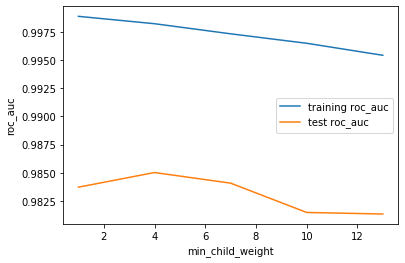

In [62]:
# plotting roc_auc with min_child_weight
plt.figure()
plt.plot(scores["param_min_child_weight"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_child_weight"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_child_weight")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal results are observed when min_child_weight=4. We now narrow down the range.

In [55]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_child_weight': [3,4,5,6]}

# instantiate the model
xgm = XGBClassifier(max_depth=3,random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:  1.3min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:  1.3min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:  1.3min remaining:   55.1s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  1.9min remaining:   37.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_child_weight': [3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
     

In [58]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

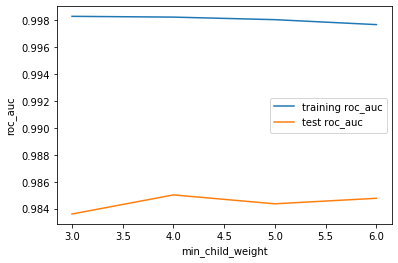

In [59]:
# plotting roc_auc with min_child_weight
plt.figure()
plt.plot(scores["param_min_child_weight"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_child_weight"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_child_weight")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

min_child_weight=4 still has the highest validation score, however there is lesser overfitting in case of min_child_weight=6.

### Tuning gamma

In [63]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'gamma': [0.1,0.2,0.3,0.4,0.5]}

# instantiate the model
xgm = XGBClassifier(max_depth=3,min_child_weight=4,random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  1.3min remaining:  8.7min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  1.4min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  1.4min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  1.4min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  2.5min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  2.5min remaining:   37.5s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=4,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.1, 0.2, 0.3, 0.4, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
   

In [64]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

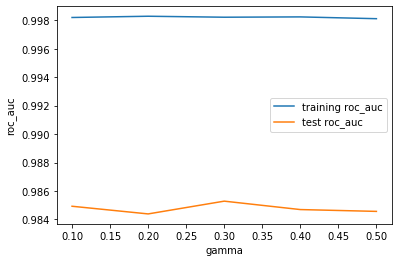

In [65]:
# plotting roc_auc with gamma
plt.figure()
plt.plot(scores["param_gamma"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_gamma"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("gamma")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal values are observed with gamma=0.3

### Tuning regularization parameters

In [66]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'reg_alpha': [0.001,0.01,0.1,0.4,0.8]}

# instantiate the model
xgm = XGBClassifier(max_depth=3,gamma=0.3,min_child_weight=4,random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  1.2min remaining:  8.1min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  1.3min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  1.3min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  1.3min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  2.4min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  2.4min remaining:   35.6s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0.3,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=4,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'reg_alpha': [0.001, 0.01, 0.1, 0.4, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [68]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

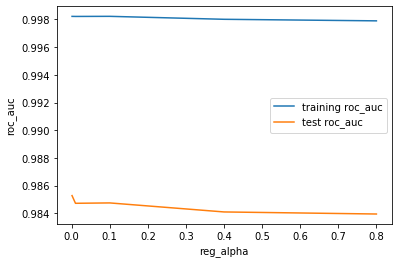

In [70]:
# plotting roc_auc with min_samples_split
plt.figure()
plt.plot(scores["param_reg_alpha"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_reg_alpha"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("reg_alpha")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal results are observed with reg_alpha=0.001, we now try to narrow down the range.

In [71]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'reg_alpha': [0.00001,0.0001,0.001]}

# instantiate the model
xgm = XGBClassifier(max_depth=3,gamma=0.3,min_child_weight=4,random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:  1.3min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  1.3min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  1.3min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:  1.3min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  1.3min remaining:   38.5s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  1.3min remaining:   22.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0.3,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=4,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'reg_alpha': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,


In [72]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

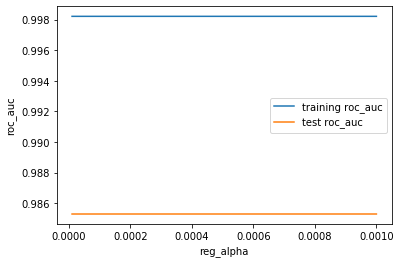

In [73]:
# plotting roc_auc with min_samples_split
plt.figure()
plt.plot(scores["param_reg_alpha"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_reg_alpha"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("reg_alpha")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

The results are same for values less than 0.001

### GridSearchCV to find optimal parameters for XGBoost Model

In [112]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_child_weight': [4,5,6],
              'reg_alpha': [0.00001,0.0001,0.001],
              'gamma':[0.25,0.3,0.35]
             }

# instantiate the model
xgm = XGBClassifier(max_depth=3,reg_alpha=0.001,random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done  75 out of  81 | elapsed: 13.2min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 13.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0.001,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.25, 0.3, 0.35],
                         'min_child_weight': [4, 5, 6],
                         'r

In [113]:
# printing the optimal recall score and hyperparameters
print('We can get best roc_auc of',xgm.best_score_,'using',xgm.best_params_)

We can get best roc_auc of 0.985286932475614 using {'gamma': 0.35, 'min_child_weight': 4, 'reg_alpha': 0.0001}


In [107]:
xgm1=XGBClassifier(max_depth=3,reg_alpha=0.0001,gamma=0.35,min_child_weight=4,random_state=100)

In [108]:
xgm1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.35,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0.0001, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [111]:
y_train_prob=xgm1.predict_proba(X_train)[:,1]

In [112]:
xgm1_df=pd.DataFrame()
xgm1_df['Fraud']=y_train
xgm1_df['Fraud_prob']=y_train_prob

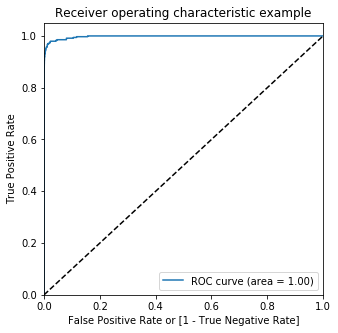

In [113]:
draw_roc(xgm1_df.Fraud, xgm1_df.Fraud_prob)

In [114]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    xgm1_df[i]= xgm1_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
xgm1_df.head()

,Fraud,Fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
222925,0,0.000061,1,0,0,0,0,0,0,0,0,0
163811,0,0.000143,1,0,0,0,0,0,0,0,0,0
196038,0,0.000067,1,0,0,0,0,0,0,0,0,0
25173,0,0.000089,1,0,0,0,0,0,0,0,0,0
253792,0,0.000361,1,0,0,0,0,0,0,0,0,0


In [115]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(xgm1_df.Fraud, xgm1_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

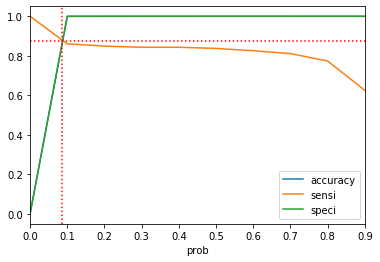

In [116]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.085,color='r',ls='dotted')
plt.axhline(y=0.875,color='r',ls='dotted')
plt.show()

In [117]:
p, r, thresholds = precision_recall_curve(xgm1_df.Fraud, xgm1_df.Fraud_prob)

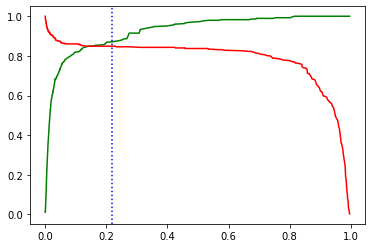

In [119]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.22,color='b',ls='dotted')
plt.show()

The optimal threshold is chosen as 0.12

In [131]:
xgm1_df['Final_Pred']=xgm1_df.Fraud_prob.map( lambda x: 1 if x > 0.12 else 0)

In [132]:
cmf=metrics.confusion_matrix(xgm1_df['Fraud'],xgm1_df['Final_Pred'])

In [133]:
cmf

array([[198964,     56],
       [    51,    293]], dtype=int64)

In [134]:
tr_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

### Predicting on Test Set

In [135]:
#Creating a DataFrame of the original target variable and Fraud Probability 
y_test_pred=xgm1.predict_proba(X_test)[:,1]
y_test_pred_final = pd.DataFrame({'Fraud':y_test.values, 'Fraud_prob':y_test_pred})

In [136]:
y_test_pred_final['Final_Pred'] = y_test_pred_final.Fraud_prob.map(lambda x: 1 if x > 0.12 else 0)

In [137]:
cmf=metrics.confusion_matrix(y_test_pred_final['Fraud'],y_test_pred_final['Final_Pred'])

In [138]:
cmf

array([[85256,    39],
       [   24,   124]], dtype=int64)

In [139]:
te_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

In [140]:
mr.loc['XGBoost with no sampling','Training Accuracy']=metrics.accuracy_score(xgm1_df.Fraud,xgm1_df.Final_Pred)
mr.loc['XGBoost with no sampling','Test Accuracy']=metrics.accuracy_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['XGBoost with no sampling','Training Recall']=metrics.recall_score(xgm1_df.Fraud,xgm1_df.Final_Pred)
mr.loc['XGBoost with no sampling','Test Recall']=metrics.recall_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['XGBoost with no sampling','Training Precision']=metrics.precision_score(xgm1_df.Fraud,xgm1_df.Final_Pred)
mr.loc['XGBoost with no sampling','Test Precision']=metrics.precision_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['XGBoost with no sampling','Training f1_score']=metrics.f1_score(xgm1_df.Fraud,xgm1_df.Final_Pred)
mr.loc['XGBoost with no sampling','Test f1_score']=metrics.f1_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['XGBoost with no sampling','Training Specificity']=tr_sp
mr.loc['XGBoost with no sampling','Test Specificity']=te_sp

In [141]:
mr

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision,Training Specificity,Test Specificity,Training f1_score,Test f1_score
Logistic Regression-l1 regularized with no sampling,0.999333,0.999111,0.811047,0.777027,0.804035,0.727848,0.999658,0.999496,0.807525,0.751634
Random Forest with no sampling,0.999318,0.999052,0.805233,0.763514,0.800578,0.710692,0.999653,0.999461,0.802899,0.736156
Decision Tree without Sampling,0.999318,0.998982,0.755814,0.682432,0.833333,0.716312,0.999739,0.999531,0.792683,0.698962
XGBoost with no sampling,0.999463,0.999263,0.851744,0.837838,0.839542,0.760736,0.999719,0.999543,0.845599,0.797428


## Random Oversampling

We now experiment with the same models using Random Oversampling.

In [142]:
from imblearn.over_sampling import RandomOverSampler

#training set
print("Before OverSampling, counts of label '1' in training set: {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0' in training set: {} \n".format(sum(y_train == 0))) 

print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 

os = RandomOverSampler(random_state = 2) 
X_train_os, y_train_os = os.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_os.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_os.shape)) 
  
print("After OverSampling, counts of label '1' in training set: {}".format(sum(y_train_os == 1))) 
print("After OverSampling, counts of label '0' in training set: {}".format(sum(y_train_os == 0))) 

Using TensorFlow backend.


Before OverSampling, counts of label '1' in training set: 344
Before OverSampling, counts of label '0' in training set: 199020 

Before OverSampling, the shape of train_X: (199364, 29)
Before OverSampling, the shape of train_y: (199364,) 

After OverSampling, the shape of train_X: (398040, 29)
After OverSampling, the shape of train_y: (398040,) 

After OverSampling, counts of label '1' in training set: 199020
After OverSampling, counts of label '0' in training set: 199020


## Logistic Regression

In [267]:
#L1 regularized

logistic=LogisticRegression(penalty='l1',solver='liblinear',class_weight='balanced')

# Create regularization hyperparameter list
C = [0.001,0.01,0.1,0.2,0.5,1,2,4,8]

# Create hyperparameter options
hyperparameters = dict(C=C)

In [269]:
lr2 = GridSearchCV(logistic, hyperparameters, cv=3, verbose=5,n_jobs=-1,scoring='roc_auc',return_train_score=True)
lr2.fit(X_train_os,y_train_os)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:  8.8min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed: 11.4min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 11.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 0.5, 1, 2, 4, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=5)

In [270]:
#scores of GridSearchCV
scores = pd.DataFrame(lr2.cv_results_)

In [271]:
lr2.best_estimator_

LogisticRegression(C=4, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

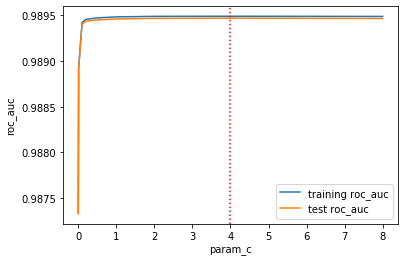

In [272]:
# plotting roc_auc_score with value of param_C for l1 regularization
plt.figure()
plt.plot(scores["param_C"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_C"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("param_c")
plt.ylabel("roc_auc")
plt.axvline(x=4,color='r',ls='dotted')
plt.legend()
plt.show()

Optimal scores are observed with c=4.

In [143]:
lr2f=LogisticRegression(penalty='l1',C=4,solver='liblinear',random_state=100)
lr2f.fit(X_train_os,y_train_os)

LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=100, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
y_train_prob=lr2f.predict_proba(X_train_os)[:,1]

In [145]:
lr2_df=pd.DataFrame()
lr2_df['Fraud']=y_train_os
lr2_df['Fraud_prob']=y_train_prob

### ROC Curve

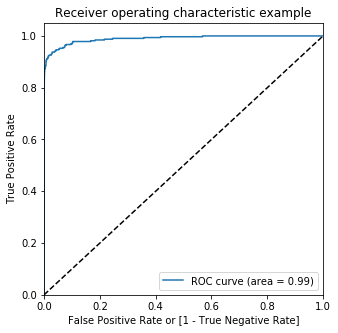

In [146]:
draw_roc(lr2_df.Fraud, lr2_df.Fraud_prob)

In [147]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    lr2_df[i]= lr2_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
lr2_df.head()

,Fraud,Fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.026286,1,0,0,0,0,0,0,0,0,0
1,0,0.048187,1,0,0,0,0,0,0,0,0,0
2,0,0.039034,1,0,0,0,0,0,0,0,0,0
3,0,0.014569,1,0,0,0,0,0,0,0,0,0
4,0,0.189055,1,1,0,0,0,0,0,0,0,0


In [148]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(lr2_df.Fraud, lr2_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

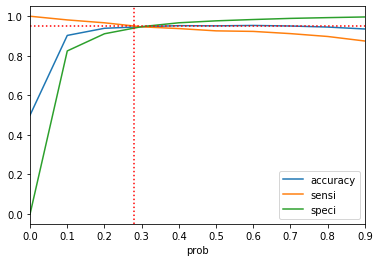

In [149]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.28,color='r',ls='dotted')
plt.axhline(y=0.95,color='r',ls='dotted')
plt.show()

In [150]:
p, r, thresholds = precision_recall_curve(lr2_df.Fraud, lr2_df.Fraud_prob)

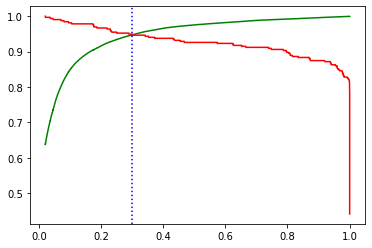

In [151]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.3,color='b',ls='dotted')
plt.show()

The optimal threshold is chosen as 0.3

In [199]:
lr2_df['Final_Pred']=lr2_df.Fraud_prob.map( lambda x: 1 if x > 0.3 else 0)

In [200]:
cmf=metrics.confusion_matrix(lr2_df['Fraud'],lr2_df['Final_Pred'])

In [201]:
cmf

array([[188533,  10487],
       [ 10649, 188371]], dtype=int64)

In [202]:
tr_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

### Predicting on Test Set

In [192]:
#Creating a DataFrame of the original target variable and Fraud Probability 
y_test_pred=lr2f.predict_proba(X_test)[:,1]
y_test_pred_final = pd.DataFrame({'Fraud':y_test.values, 'Fraud_prob':y_test_pred})

In [203]:
y_test_pred_final['Final_Pred'] = y_test_pred_final.Fraud_prob.map(lambda x: 1 if x > 0.3 else 0)

In [204]:
cmf=metrics.confusion_matrix(y_test_pred_final['Fraud'],y_test_pred_final['Final_Pred'])

In [205]:
cmf

array([[80869,  4426],
       [   13,   135]], dtype=int64)

In [206]:
te_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

In [207]:
mr.loc['Logistic Regression-l1 regularized with random over sampling','Training Accuracy']=metrics.accuracy_score(lr2_df.Fraud,lr2_df.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with random over sampling','Test Accuracy']=metrics.accuracy_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with random over sampling','Training Recall']=metrics.recall_score(lr2_df.Fraud,lr2_df.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with random over sampling','Test Recall']=metrics.recall_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with random over sampling','Training Precision']=metrics.precision_score(lr2_df.Fraud,lr2_df.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with random over sampling','Test Precision']=metrics.precision_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with random over sampling','Training f1_score']=metrics.f1_score(lr2_df.Fraud,lr2_df.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with random over sampling','Test f1_score']=metrics.f1_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with random over sampling','Training Specificity']=tr_sp
mr.loc['Logistic Regression-l1 regularized with random over sampling','Test Specificity']=te_sp

In [208]:
mr

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision,Training Specificity,Test Specificity,Training f1_score,Test f1_score
Logistic Regression-l1 regularized with no sampling,0.999333,0.999111,0.811047,0.777027,0.804035,0.727848,0.999658,0.999496,0.807525,0.751634
Random Forest with no sampling,0.999318,0.999052,0.805233,0.763514,0.800578,0.710692,0.999653,0.999461,0.802899,0.736156
Decision Tree without Sampling,0.999318,0.998982,0.755814,0.682432,0.833333,0.716312,0.999739,0.999531,0.792683,0.698962
XGBoost with no sampling,0.999463,0.999263,0.851744,0.837838,0.839542,0.760736,0.999719,0.999543,0.845599,0.797428
Logistic Regression-l1 regularized with random over sampling,0.946900,0.948047,0.946493,0.912162,0.947264,0.029599,0.947307,0.948110,0.946878,0.057337


## Random Forest

### Tuning max_depth

In [306]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 3)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
rf.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:  1.8min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:  2.5min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:  3.4min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:  3.8min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  4.8min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  5.2min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  5.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                           

In [307]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

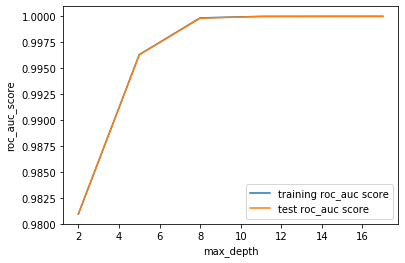

In [308]:
# plotting roc_auc score with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_depth")
plt.ylabel("roc_auc_score")
plt.legend()
plt.show()

Minimal overfitting is observed for the range between 8-17. Therefore, we narrow down the range now.

In [310]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': [8,12,17]}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
rf.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:  2.4min remaining:  8.4min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  2.5min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  2.8min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:  2.8min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  2.8min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  2.9min remaining:   50.1s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  3.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  3.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                           

In [311]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

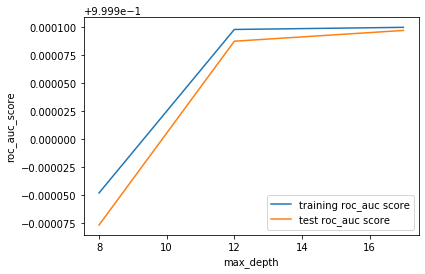

In [312]:
# plotting roc_auc score with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_depth")
plt.ylabel("roc_auc_score")
plt.legend()
plt.show()

Highest roc_auc score is observed with max_depth=17.

### Tuning n_estimators

In [313]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=17,class_weight='balanced',random_state=100) 


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
rf.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:  3.2min remaining:  9.7min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed: 16.0min remaining: 22.4min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed: 24.9min remaining: 17.8min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed: 26.9min remaining:  9.0min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 36.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=17,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                             

In [314]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

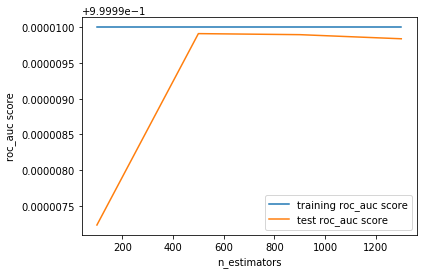

In [315]:
# plotting roc_auc with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("n_estimators")
plt.ylabel("roc_auc score")
plt.legend()
plt.show()

Optimal results are observed with n_estimators=500.

### Tuning max_features

In [316]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [4, 8, 12, 16, 20, 24, 28]}

# instantiate the model
rf = RandomForestClassifier(max_depth=17,class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:  9.9min remaining: 13.2min
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed: 13.8min remaining: 10.4min
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed: 17.1min remaining:  6.8min
[Parallel(n_jobs=-1)]: Done  18 out of  21 | elapsed: 20.9min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 22.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 22.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=17,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                             

In [317]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

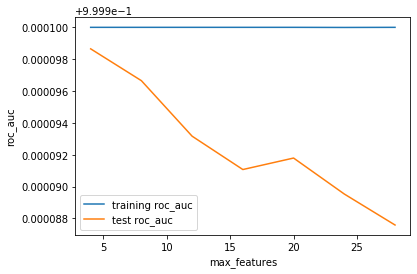

In [318]:
# plotting roc_auc with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("max_features")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal results are obtained when max_features=4. We now narrow down the range for fine tuning.

In [319]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [4,5,6,7]}

# instantiate the model
rf = RandomForestClassifier(max_depth=17,class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:  2.8min remaining:  8.3min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:  3.2min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:  3.6min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  4.9min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  5.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=17,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                             

In [320]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

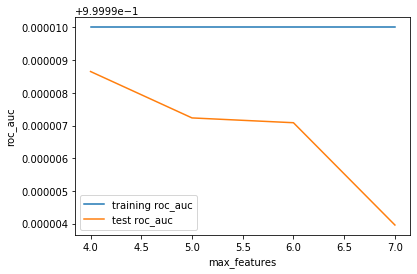

In [321]:
# plotting roc_auc with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("max_features")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal results are observed with max_features=4.

### Tuning min_samples_leaf

In [322]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=17,max_features=4,class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:  4.8min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed:  4.9min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:  7.1min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed:  7.1min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  7.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  7.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=17,
                                              max_features=4,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                  

In [323]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

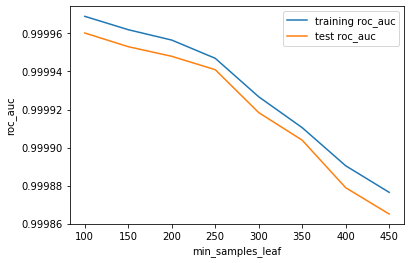

In [324]:
# plotting roc_auc with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_leaf")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Best results are observed when min_samples_leaf=100. We now narrow it down.

In [325]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': [20,50,90]}

# instantiate the model
rf = RandomForestClassifier(max_depth=17,class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:  2.9min remaining: 10.1min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  2.9min remaining:  5.8min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  2.9min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:  2.9min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  2.9min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  2.9min remaining:   50.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  3.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  3.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=17,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                             

In [326]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

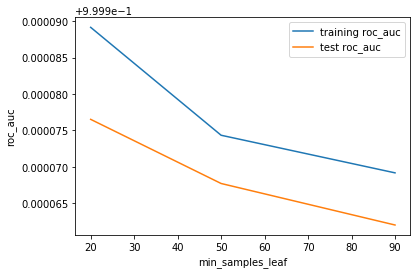

In [327]:
# plotting roc_auc with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_leaf")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal results are observed with min_samples_leaf=50.

### Tuning min_samples_split

In [209]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=17,max_features=4,class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:  5.5min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed:  5.6min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:  8.1min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed:  8.2min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  8.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  8.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=17,
                                              max_features=4,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                  

In [210]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

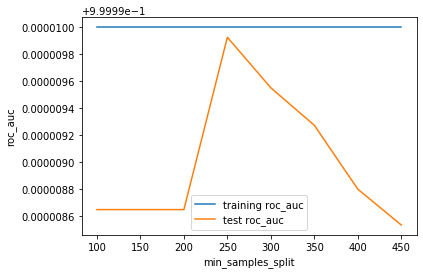

In [211]:
# plotting roc_auc with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal results are observed when min_samples_split=250.

In [212]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': [225,250,275]}

# instantiate the model
rf = RandomForestClassifier(max_depth=17,max_features=4,class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:  2.7min remaining:  9.3min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  2.7min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  2.7min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:  2.7min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  2.8min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  2.8min remaining:   47.3s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  3.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  3.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=17,
                                              max_features=4,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                  

In [213]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

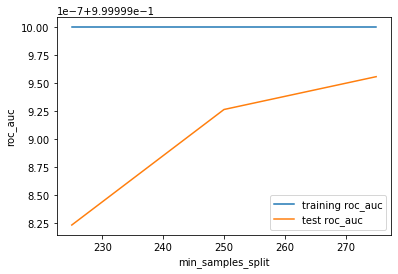

In [214]:
# plotting roc_auc with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal results are observed when min_samples_split=275.

### Grid Search to find optimal parameters

In [215]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_leaf': [40,50,60],
    'min_samples_split': [275,300]}
# Create a based model
rf = RandomForestClassifier(max_depth=17,max_features=4,n_estimators=500,class_weight='balanced',random_state=100)
# Instantiate the grid search model
rf1 = GridSearchCV(estimator = rf, param_grid = param_grid,scoring='roc_auc',
                          cv = 3, n_jobs = -1,verbose = 10)

rf1.fit(X_train_os,y_train_os)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed: 12.1min remaining: 31.4min
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed: 12.1min remaining: 19.0min
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed: 23.5min remaining: 23.5min
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed: 23.7min remaining: 15.1min
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed: 24.0min remaining:  9.2min
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed: 24.0min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 28.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=17,
                                              max_features=4,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=None,
                                              oob_score=False, random_state=100,
                                  

In [216]:
# printing the optimal recall score and hyperparameters
print('We can get best roc_auc of',rf1.best_score_,'using',rf1.best_params_)

We can get best roc_auc of 0.9999719331689402 using {'min_samples_leaf': 40, 'min_samples_split': 275}


In [217]:
rf2=RandomForestClassifier(class_weight='balanced',max_depth=17,max_features=4,min_samples_leaf=40,min_samples_split=275,
                           n_estimators=500,random_state=100)
rf2.fit(X_train_os,y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=17, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=275,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [218]:
y_train_prob=rf2.predict_proba(X_train_os)[:,1]

In [219]:
rf2_df=pd.DataFrame()
rf2_df['Fraud']=y_train_os
rf2_df['Fraud_prob']=y_train_prob

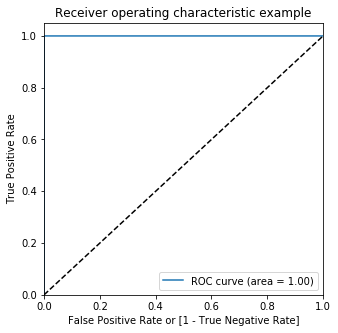

In [220]:
draw_roc(rf2_df.Fraud, rf2_df.Fraud_prob)

In [221]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    rf2_df[i]= rf2_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
rf2_df.head()

,Fraud,Fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000000,0,0,0,0,0,0,0,0,0,0
1,0,0.000217,1,0,0,0,0,0,0,0,0,0
2,0,0.000000,0,0,0,0,0,0,0,0,0,0
3,0,0.001872,1,0,0,0,0,0,0,0,0,0
4,0,0.002794,1,0,0,0,0,0,0,0,0,0


In [222]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(rf2_df.Fraud, rf2_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

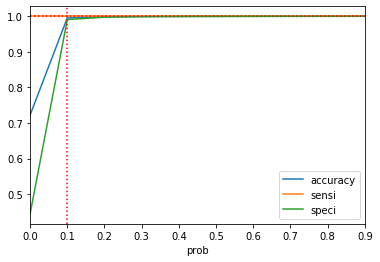

In [305]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.1,color='r',ls='dotted')
plt.axhline(y=1,color='r',ls='dotted')
plt.show()

In [223]:
p, r, thresholds = precision_recall_curve(rf2_df.Fraud, rf2_df.Fraud_prob)

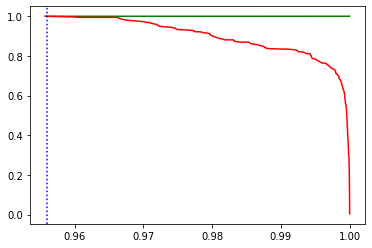

In [228]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.956,color='b',ls='dotted')
plt.show()

We choose to go with 0.956.

In [229]:
rf2_df['Final_Pred']=rf2_df.Fraud_prob.map( lambda x: 1 if x > 0.956 else 0)

In [230]:
cmf=metrics.confusion_matrix(rf2_df['Fraud'],rf2_df['Final_Pred'])

In [231]:
cmf

array([[198993,     27],
       [   624, 198396]], dtype=int64)

In [232]:
tr_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

### Predicting on Test Set

In [233]:
#Creating a DataFrame of the original target variable and Fraud Probability 
y_test_pred=rf2.predict_proba(X_test)[:,1]
y_test_pred_final = pd.DataFrame({'Fraud':y_test.values, 'Fraud_prob':y_test_pred})

In [234]:
y_test_pred_final['Final_Pred'] = y_test_pred_final.Fraud_prob.map(lambda x: 1 if x > 0.943 else 0)

In [235]:
cmf=metrics.confusion_matrix(y_test_pred_final['Fraud'],y_test_pred_final['Final_Pred'])

In [236]:
cmf

array([[85278,    17],
       [   51,    97]], dtype=int64)

In [237]:
te_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

In [238]:
mr.loc['Random Forest with random over sampling','Training Accuracy']=metrics.accuracy_score(rf2_df.Fraud,rf2_df.Final_Pred)
mr.loc['Random Forest with random over sampling','Test Accuracy']=metrics.accuracy_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Random Forest with random over sampling','Training Recall']=metrics.recall_score(rf2_df.Fraud,rf2_df.Final_Pred)
mr.loc['Random Forest with random over sampling','Test Recall']=metrics.recall_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Random Forest with random over sampling','Training Precision']=metrics.precision_score(rf2_df.Fraud,rf2_df.Final_Pred)
mr.loc['Random Forest with random over sampling','Test Precision']=metrics.precision_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Random Forest with random over sampling','Training f1_score']=metrics.f1_score(rf2_df.Fraud,rf2_df.Final_Pred)
mr.loc['Random Forest with random over sampling','Test f1_score']=metrics.f1_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Random Forest with random over sampling','Training Specificity']=tr_sp
mr.loc['Random Forest with random over sampling','Test Specificity']=te_sp

In [239]:
mr

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision,Training Specificity,Test Specificity,Training f1_score,Test f1_score
Logistic Regression-l1 regularized with no sampling,0.999333,0.999111,0.811047,0.777027,0.804035,0.727848,0.999658,0.999496,0.807525,0.751634
Random Forest with no sampling,0.999318,0.999052,0.805233,0.763514,0.800578,0.710692,0.999653,0.999461,0.802899,0.736156
Decision Tree without Sampling,0.999318,0.998982,0.755814,0.682432,0.833333,0.716312,0.999739,0.999531,0.792683,0.698962
XGBoost with no sampling,0.999463,0.999263,0.851744,0.837838,0.839542,0.760736,0.999719,0.999543,0.845599,0.797428
Logistic Regression-l1 regularized with random over sampling,0.946900,0.948047,0.946493,0.912162,0.947264,0.029599,0.947307,0.948110,0.946878,0.057337
Random Forest with random over sampling,0.998364,0.999204,0.996865,0.655405,0.999864,0.850877,0.999864,0.999801,0.998362,0.740458


## Decision Tree Classifier

### Tuning max_depth

In [47]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 3)}

# instantiate the model
dt = DecisionTreeClassifier(random_state=100)


# fit tree on training data
dt = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
dt.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:   16.4s remaining:   42.8s
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:   19.1s remaining:   30.1s
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:   20.1s remaining:   20.1s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:   24.9s remaining:   15.8s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:   27.1s remaining:   10.3s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   28.7s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   30.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 3)}, pre_dispatch='2*n_jobs',


In [48]:
scores=pd.DataFrame(dt.cv_results_)

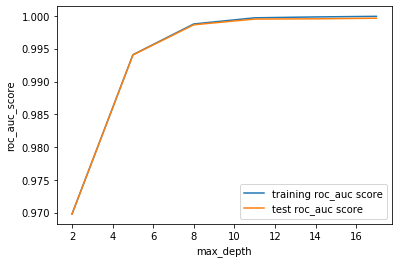

In [49]:
# plotting roc_auc score with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_depth")
plt.ylabel("roc_auc_score")
plt.legend()
plt.show()

In [50]:
dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

Optimal max_depth=17.

### Tuning min_samples_split

In [51]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': [50,100,150,200,250,300,350,400]}

# instantiate the model
dt = DecisionTreeClassifier(max_depth=17,random_state=100)


# fit tree on training data
dt = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
dt.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:   25.9s remaining:   25.9s
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed:   27.3s remaining:   16.3s
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:   37.7s remaining:   12.5s
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed:   38.3s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   38.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   38.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=17,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_samples_split': [50, 100, 150, 200, 250, 300, 350,
  

In [52]:
# scores of GridSearch CV
scores = pd.DataFrame(dt.cv_results_)

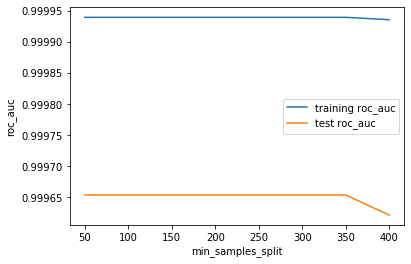

In [53]:
# plotting roc_auc with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal min_samples_split=50.

In [240]:
dt2=DecisionTreeClassifier(max_depth=17,min_samples_split=50,random_state=100)
dt2.fit(X_train_os,y_train_os)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [241]:
y_train_prob=dt2.predict_proba(X_train)[:,1]

In [242]:
dt2_df=pd.DataFrame()
dt2_df['Fraud']=y_train
dt2_df['Fraud_prob']=y_train_prob

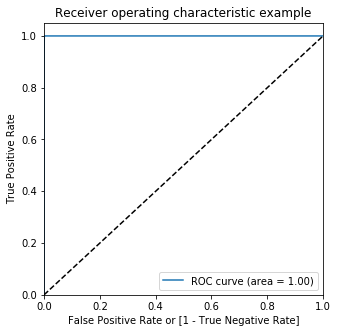

In [243]:
draw_roc(dt2_df.Fraud, dt2_df.Fraud_prob)

In [244]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    dt2_df[i]= dt2_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
dt2_df.head()

,Fraud,Fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
222925,0,0.0,0,0,0,0,0,0,0,0,0,0
163811,0,0.0,0,0,0,0,0,0,0,0,0,0
196038,0,0.0,0,0,0,0,0,0,0,0,0,0
25173,0,0.0,0,0,0,0,0,0,0,0,0,0
253792,0,0.0,0,0,0,0,0,0,0,0,0,0


In [245]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(dt2_df.Fraud, dt2_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

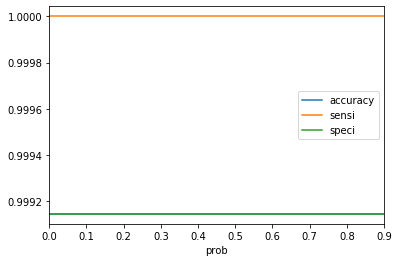

In [246]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [247]:
p, r, thresholds = precision_recall_curve(dt2_df.Fraud, dt2_df.Fraud_prob)

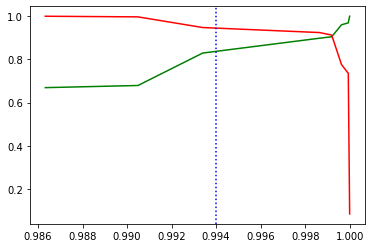

In [248]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.994,color='b',ls='dotted')
plt.show()

Optimal threshold is chosen as 0.994

In [249]:
dt2_df['Final_Pred']=dt2_df.Fraud_prob.map( lambda x: 1 if x > 0.994 else 0)

In [250]:
cmf=metrics.confusion_matrix(dt2_df['Fraud'],dt2_df['Final_Pred'])

In [251]:
cmf

array([[198984,     36],
       [    26,    318]], dtype=int64)

In [252]:
tr_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

### Predicting on Test Set

In [253]:
#Creating a DataFrame of the original target variable and Fraud Probability 
y_test_pred=dt2.predict_proba(X_test)[:,1]
y_test_pred_final = pd.DataFrame({'Fraud':y_test.values, 'Fraud_prob':y_test_pred})

In [254]:
y_test_pred_final['Final_Pred'] = y_test_pred_final.Fraud_prob.map(lambda x: 1 if x > 0.994 else 0)

In [255]:
cmf=metrics.confusion_matrix(y_test_pred_final['Fraud'],y_test_pred_final['Final_Pred'])

In [256]:
cmf

array([[85256,    39],
       [   30,   118]], dtype=int64)

In [257]:
te_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

In [258]:
mr.loc['Decision Tree with Random Over Sampling','Training Accuracy']=metrics.accuracy_score(dt2_df.Fraud,dt2_df.Final_Pred)
mr.loc['Decision Tree with Random Over Sampling','Test Accuracy']=metrics.accuracy_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Decision Tree with Random Over Sampling','Training Recall']=metrics.recall_score(dt2_df.Fraud,dt2_df.Final_Pred)
mr.loc['Decision Tree with Random Over Sampling','Test Recall']=metrics.recall_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Decision Tree with Random Over Sampling','Training Precision']=metrics.precision_score(dt2_df.Fraud,dt2_df.Final_Pred)
mr.loc['Decision Tree with Random Over Sampling','Test Precision']=metrics.precision_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Decision Tree with Random Over Sampling','Training f1_score']=metrics.f1_score(dt2_df.Fraud,dt2_df.Final_Pred)
mr.loc['Decision Tree with Random Over Sampling','Test f1_score']=metrics.f1_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Decision Tree with Random Over Sampling','Training Specificity']=tr_sp
mr.loc['Decision Tree with Random Over Sampling','Test Specificity']=te_sp

In [259]:
mr

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision,Training Specificity,Test Specificity,Training f1_score,Test f1_score
Logistic Regression-l1 regularized with no sampling,0.999333,0.999111,0.811047,0.777027,0.804035,0.727848,0.999658,0.999496,0.807525,0.751634
Random Forest with no sampling,0.999318,0.999052,0.805233,0.763514,0.800578,0.710692,0.999653,0.999461,0.802899,0.736156
Decision Tree without Sampling,0.999318,0.998982,0.755814,0.682432,0.833333,0.716312,0.999739,0.999531,0.792683,0.698962
XGBoost with no sampling,0.999463,0.999263,0.851744,0.837838,0.839542,0.760736,0.999719,0.999543,0.845599,0.797428
Logistic Regression-l1 regularized with random over sampling,0.946900,0.948047,0.946493,0.912162,0.947264,0.029599,0.947307,0.948110,0.946878,0.057337
Random Forest with random over sampling,0.998364,0.999204,0.996865,0.655405,0.999864,0.850877,0.999864,0.999801,0.998362,0.740458
Decision Tree with Random Over Sampling,0.999689,0.999192,0.924419,0.797297,0.898305,0.751592,0.999819,0.999543,0.911175,0.773770


## XGBoost

### Tuning max_depth

In [364]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 3)}

# instantiate the model
xgm = XGBClassifier(tree_method='hist',random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
xgm.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:   29.0s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:   32.7s remaining:   51.4s
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:   46.0s remaining:   46.0s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:   48.6s remaining:   30.9s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:   54.8s remaining:   21.0s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   56.9s remaining:   11.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 3)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_s

In [365]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

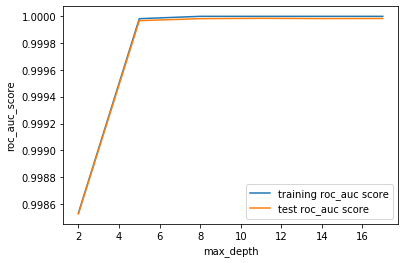

In [366]:
# plotting roc_auc score with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_depth")
plt.ylabel("roc_auc_score")
plt.legend()
plt.show()

Optimal results are observed when max_depth=11. We further narrow down the range.

In [368]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': [10,11,12]}

# instantiate the model
xgm = XGBClassifier(tree_method='hist',random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
xgm.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:   31.8s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   32.0s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   32.1s remaining:   40.1s
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:   32.6s remaining:   26.0s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:   33.0s remaining:   16.4s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:   33.2s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   42.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   42.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_scor

In [369]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

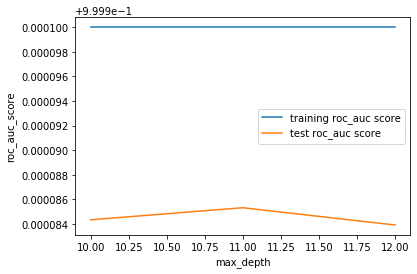

In [370]:
# plotting roc_auc score with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_depth")
plt.ylabel("roc_auc_score")
plt.legend()
plt.show()

Optimal results are observed with max_depth=11.

### Tuning n_estimators

In [371]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
xgm = XGBClassifier(max_depth=11,tree_method='hist',random_state=100) 


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
xgm.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:   27.0s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:  1.4min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:  1.9min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  2.1min remaining:   42.7s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=11, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': range(100, 1500, 400)},
             pre_dispatch='2*n_jobs', refit=True, retu

In [372]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

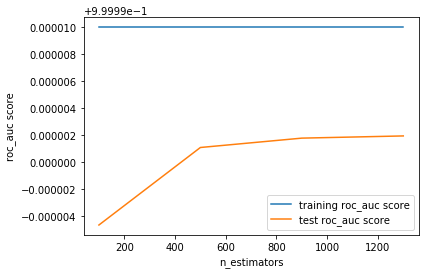

In [373]:
# plotting roc_auc with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("n_estimators")
plt.ylabel("roc_auc score")
plt.legend()
plt.show()

Optimal no. estimators is 1300.

### Tuning min_child_weight

In [375]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_child_weight': [1,4,7,10,13]}

# instantiate the model
xgm = XGBClassifier(max_depth=11,tree_method='hist',n_estimators=1300,random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  2.5min remaining: 16.1min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  2.6min remaining:  7.0min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  2.7min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  2.8min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  4.6min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  4.6min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=11, min_child_weight=1,
                                     missing=None, n_estimators=1300, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_child_weight': [1, 4, 7, 10, 13]},
             pre_dispatch='2*n_jobs', refit=True, ret

In [376]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

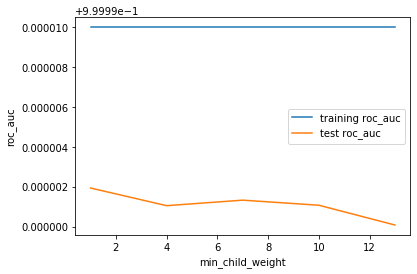

In [377]:
# plotting roc_auc with min_child_weight
plt.figure()
plt.plot(scores["param_min_child_weight"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_child_weight"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_child_weight")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal results are obtained with min_child_weight=1. We fine tune further.

### Tuning gamma

In [88]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'gamma': [0.1,0.2,0.3,0.4,0.5]}

# instantiate the model
xgm = XGBClassifier(max_depth=11,min_child_weight=1,tree_method='hist',n_estimators=1300,random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  3.6min remaining: 23.7min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.9min remaining: 10.7min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  3.9min remaining:  5.9min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  4.1min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  7.5min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  7.6min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  7.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=11, min_child_weight=1,
                                     missing=None, n_estimators=1300, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.1, 0.2, 0.3, 0.4, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return

In [89]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

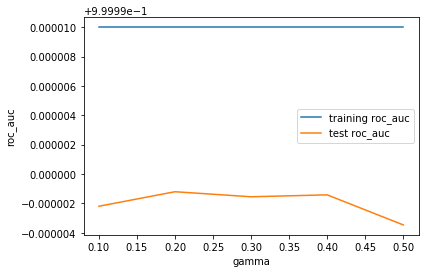

In [90]:
# plotting roc_auc with gamma
plt.figure()
plt.plot(scores["param_gamma"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_gamma"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("gamma")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal results are achieved when gamma is around 0.2

### Grid Search CV to find optimal parameters

In [91]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {
              'gamma':[0.15,0.2,0.25]
             }

# instantiate the model
xgm = XGBClassifier(max_depth=11,n_estimators=1300,min_child_weight=1,tree_method='hist',random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:  3.6min remaining: 12.5min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  3.7min remaining:  7.5min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  3.8min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:  3.8min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  3.8min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  3.9min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  5.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  5.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=11, min_child_weight=1,
                                     missing=None, n_estimators=1300, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.15, 0.2, 0.25]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_s

In [92]:
# printing the optimal recall score and hyperparameters
print('We can get best roc_auc of',xgm.best_score_,'using',xgm.best_params_)

We can get best roc_auc of 0.9999897045265547 using {'gamma': 0.25}


In [260]:
xgm2=XGBClassifier(max_depth=11,gamma=0.25,min_child_weight=1,tree_method='hist',n_estimators=1300,random_state=100)

In [261]:
xgm2.fit(X_train_os,y_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.25,
              learning_rate=0.1, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=None, n_estimators=1300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='hist', verbosity=1)

In [262]:
y_train_prob=xgm2.predict_proba(X_train_os)[:,1]

In [263]:
xgm2_df=pd.DataFrame()
xgm2_df['Fraud']=y_train_os
xgm2_df['Fraud_prob']=y_train_prob

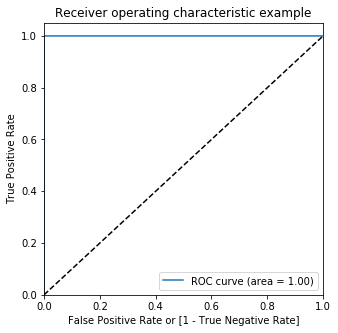

In [264]:
draw_roc(xgm2_df.Fraud, xgm2_df.Fraud_prob)

In [265]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    xgm2_df[i]= xgm2_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
xgm2_df.head()

,Fraud,Fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000003,1,0,0,0,0,0,0,0,0,0
1,0,0.000011,1,0,0,0,0,0,0,0,0,0
2,0,0.000005,1,0,0,0,0,0,0,0,0,0
3,0,0.000004,1,0,0,0,0,0,0,0,0,0
4,0,0.000031,1,0,0,0,0,0,0,0,0,0


In [266]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(xgm2_df.Fraud, xgm2_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

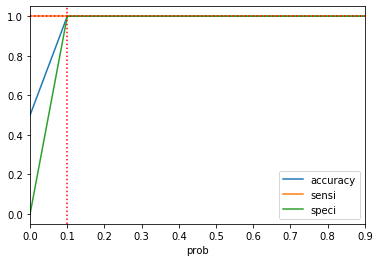

In [267]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.1,color='r',ls='dotted')
plt.axhline(y=1,color='r',ls='dotted')
plt.show()

In [268]:
p, r, thresholds = precision_recall_curve(xgm2_df.Fraud, xgm2_df.Fraud_prob)

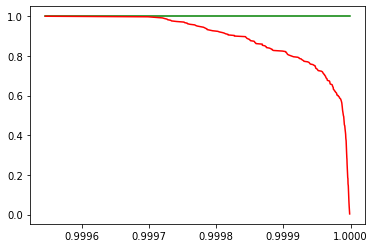

In [269]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The optimum threshold is chosen as 0.99

In [270]:
xgm2_df['Final_Pred']=xgm2_df.Fraud_prob.map( lambda x: 1 if x > 0.99 else 0)

In [271]:
cmf=metrics.confusion_matrix(xgm2_df['Fraud'],xgm2_df['Final_Pred'])

In [272]:
cmf

array([[199020,      0],
       [     0, 199020]], dtype=int64)

In [273]:
tr_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

### Predicting on Test Set

In [274]:
#Creating a DataFrame of the original target variable and Fraud Probability 
y_test_pred=xgm2.predict_proba(X_test)[:,1]
y_test_pred_final = pd.DataFrame({'Fraud':y_test.values, 'Fraud_prob':y_test_pred})

In [275]:
y_test_pred_final['Final_Pred'] = y_test_pred_final.Fraud_prob.map(lambda x: 1 if x > 0.99 else 0)

In [276]:
cmf=metrics.confusion_matrix(y_test_pred_final['Fraud'],y_test_pred_final['Final_Pred'])

In [277]:
cmf

array([[85287,     8],
       [   33,   115]], dtype=int64)

In [278]:
te_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

In [279]:
mr.loc['XGBoost with Random Over Sampling','Training Accuracy']=metrics.accuracy_score(xgm2_df.Fraud,xgm2_df.Final_Pred)
mr.loc['XGBoost with Random Over Sampling','Test Accuracy']=metrics.accuracy_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['XGBoost with Random Over Sampling','Training Recall']=metrics.recall_score(xgm2_df.Fraud,xgm2_df.Final_Pred)
mr.loc['XGBoost with Random Over Sampling','Test Recall']=metrics.recall_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['XGBoost with Random Over Sampling','Training Precision']=metrics.precision_score(xgm2_df.Fraud,xgm2_df.Final_Pred)
mr.loc['XGBoost with Random Over Sampling','Test Precision']=metrics.precision_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['XGBoost with Random Over Sampling','Training f1_score']=metrics.f1_score(xgm2_df.Fraud,xgm2_df.Final_Pred)
mr.loc['XGBoost with Random Over Sampling','Test f1_score']=metrics.f1_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['XGBoost with Random Over Sampling','Training Specificity']=tr_sp
mr.loc['XGBoost with Random Over Sampling','Test Specificity']=te_sp

In [280]:
mr

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision,Training Specificity,Test Specificity,Training f1_score,Test f1_score
Logistic Regression-l1 regularized with no sampling,0.999333,0.999111,0.811047,0.777027,0.804035,0.727848,0.999658,0.999496,0.807525,0.751634
Random Forest with no sampling,0.999318,0.999052,0.805233,0.763514,0.800578,0.710692,0.999653,0.999461,0.802899,0.736156
Decision Tree without Sampling,0.999318,0.998982,0.755814,0.682432,0.833333,0.716312,0.999739,0.999531,0.792683,0.698962
XGBoost with no sampling,0.999463,0.999263,0.851744,0.837838,0.839542,0.760736,0.999719,0.999543,0.845599,0.797428
Logistic Regression-l1 regularized with random over sampling,0.946900,0.948047,0.946493,0.912162,0.947264,0.029599,0.947307,0.948110,0.946878,0.057337
Random Forest with random over sampling,0.998364,0.999204,0.996865,0.655405,0.999864,0.850877,0.999864,0.999801,0.998362,0.740458
Decision Tree with Random Over Sampling,0.999689,0.999192,0.924419,0.797297,0.898305,0.751592,0.999819,0.999543,0.911175,0.773770
XGBoost with Random Over Sampling,1.000000,0.999520,1.000000,0.777027,1.000000,0.934959,1.000000,0.999906,1.000000,0.848708


## Model building using SMOTE

### SMOTE Analysis

In [281]:
from imblearn.over_sampling import SMOTE

In [282]:
#training set
print("Before OverSampling, counts of label '1' in training set: {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0' in training set: {} \n".format(sum(y_train == 0))) 

print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 

sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1' in training set: {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0' in training set: {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1' in training set: 344
Before OverSampling, counts of label '0' in training set: 199020 

Before OverSampling, the shape of train_X: (199364, 29)
Before OverSampling, the shape of train_y: (199364,) 

After OverSampling, the shape of train_X: (398040, 29)
After OverSampling, the shape of train_y: (398040,) 

After OverSampling, counts of label '1' in training set: 199020
After OverSampling, counts of label '0' in training set: 199020


## Logistic Regression

In [134]:
#L1 regularized

logistic=LogisticRegression(penalty='l1',solver='liblinear')

# Create regularization hyperparameter list
C = [0.001,0.01,0.1,0.2,0.5,1,2,4,8]

# Create hyperparameter options
hyperparameters = dict(C=C)

In [177]:
lr3 = GridSearchCV(logistic, hyperparameters, cv=3, verbose=5,n_jobs=-1,scoring='roc_auc',return_train_score=True)
lr3.fit(X_train_res,y_train_res)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:  8.2min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed: 10.7min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 10.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 0.5, 1, 2, 4, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=5)

In [178]:
#scores of GridSearchCV
scores = pd.DataFrame(lr3.cv_results_)

In [179]:
lr3.best_estimator_

LogisticRegression(C=8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

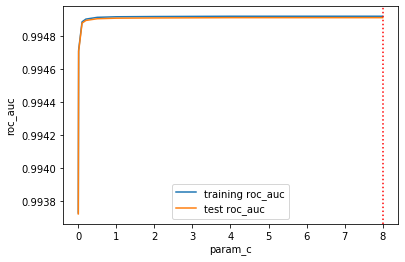

In [180]:
# plotting roc_auc_score with value of param_C for l1 regularization
plt.figure()
plt.plot(scores["param_C"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_C"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("param_c")
plt.ylabel("roc_auc")
plt.axvline(x=8,color='r',ls='dotted')
plt.legend()
plt.show()

Therefore, we choose c=8.

In [283]:
lr3f=LogisticRegression(penalty='l1',C=8,solver='liblinear')
lr3f.fit(X_train_res,y_train_res)

LogisticRegression(C=8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [284]:
y_train_prob=lr3f.predict_proba(X_train_res)[:,1]

In [285]:
lr3_df=pd.DataFrame()
lr3_df['Fraud']=y_train_res
lr3_df['Fraud_prob']=y_train_prob

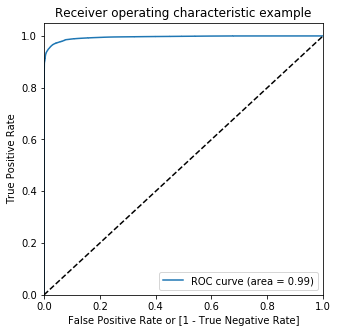

In [286]:
draw_roc(lr3_df.Fraud, lr3_df.Fraud_prob)

In [287]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    lr3_df[i]= lr3_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
lr3_df.head()

,Fraud,Fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.015039,1,0,0,0,0,0,0,0,0,0
1,0,0.023389,1,0,0,0,0,0,0,0,0,0
2,0,0.013216,1,0,0,0,0,0,0,0,0,0
3,0,0.013708,1,0,0,0,0,0,0,0,0,0
4,0,0.047910,1,0,0,0,0,0,0,0,0,0


In [288]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(lr3_df.Fraud, lr3_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

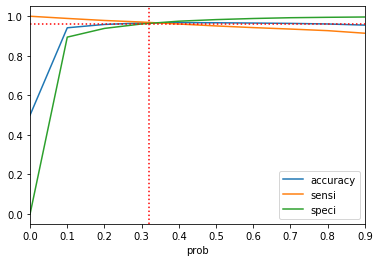

In [289]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.32
            ,color='r',ls='dotted')
plt.axhline(y=0.96,color='r',ls='dotted')
plt.show()

In [290]:
p, r, thresholds = precision_recall_curve(lr3_df.Fraud, lr3_df.Fraud_prob)

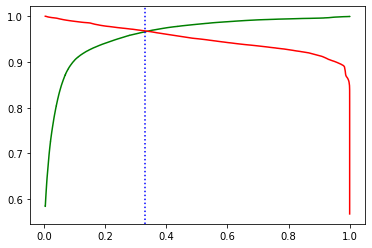

In [291]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.33,color='b',ls='dotted')
plt.show()

Therefore, we choose the threshold value as 0.33

In [292]:
lr3_df['Final_Pred']=lr3_df.Fraud_prob.map( lambda x: 1 if x > 0.33 else 0)

In [293]:
cmf=metrics.confusion_matrix(lr3_df['Fraud'],lr3_df['Final_Pred'])

In [294]:
cmf

array([[192235,   6785],
       [  6375, 192645]], dtype=int64)

In [295]:
tr_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

### Predicting on Test Set

In [296]:
#Creating a DataFrame of the original target variable and Fraud Probability 
y_test_pred=lr3f.predict_proba(X_test)[:,1]
y_test_pred_final = pd.DataFrame({'Fraud':y_test.values, 'Fraud_prob':y_test_pred})

In [297]:
y_test_pred_final['Final_Pred'] = y_test_pred_final.Fraud_prob.map(lambda x: 1 if x > 0.33 else 0)

In [298]:
cmf=metrics.confusion_matrix(y_test_pred_final['Fraud'],y_test_pred_final['Final_Pred'])

In [299]:
cmf

array([[82434,  2861],
       [   17,   131]], dtype=int64)

In [300]:
te_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

In [301]:
mr.loc['Logistic Regression-l1 regularized with SMOTE','Training Accuracy']=metrics.accuracy_score(lr3_df.Fraud,lr3_df.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with SMOTE','Test Accuracy']=metrics.accuracy_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with SMOTE','Training Recall']=metrics.recall_score(lr3_df.Fraud,lr3_df.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with SMOTE','Test Recall']=metrics.recall_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with SMOTE','Training Precision']=metrics.precision_score(lr3_df.Fraud,lr3_df.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with SMOTE','Test Precision']=metrics.precision_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with SMOTE','Training f1_score']=metrics.f1_score(lr3_df.Fraud,lr3_df.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with SMOTE','Test f1_score']=metrics.f1_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with SMOTE','Training Specificity']=tr_sp
mr.loc['Logistic Regression-l1 regularized with SMOTE','Test Specificity']=te_sp

In [302]:
mr

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision,Training Specificity,Test Specificity,Training f1_score,Test f1_score
Logistic Regression-l1 regularized with no sampling,0.999333,0.999111,0.811047,0.777027,0.804035,0.727848,0.999658,0.999496,0.807525,0.751634
Random Forest with no sampling,0.999318,0.999052,0.805233,0.763514,0.800578,0.710692,0.999653,0.999461,0.802899,0.736156
Decision Tree without Sampling,0.999318,0.998982,0.755814,0.682432,0.833333,0.716312,0.999739,0.999531,0.792683,0.698962
XGBoost with no sampling,0.999463,0.999263,0.851744,0.837838,0.839542,0.760736,0.999719,0.999543,0.845599,0.797428
Logistic Regression-l1 regularized with random over sampling,0.946900,0.948047,0.946493,0.912162,0.947264,0.029599,0.947307,0.948110,0.946878,0.057337
Random Forest with random over sampling,0.998364,0.999204,0.996865,0.655405,0.999864,0.850877,0.999864,0.999801,0.998362,0.740458
Decision Tree with Random Over Sampling,0.999689,0.999192,0.924419,0.797297,0.898305,0.751592,0.999819,0.999543,0.911175,0.773770
XGBoost with Random Over Sampling,1.000000,0.999520,1.000000,0.777027,1.000000,0.934959,1.000000,0.999906,1.000000,0.848708
Logistic Regression-l1 regularized with SMOTE,0.966938,0.966317,0.967968,0.885135,0.965978,0.043783,0.965908,0.966458,0.966972,0.083439


## Random Forest

### Tuning max_depth

In [150]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 3)}

# instantiate the model
rf = RandomForestClassifier(random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
rf.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:  2.2min remaining:  5.7min
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:  3.3min remaining:  5.1min
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:  4.2min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:  5.1min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  6.8min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  7.6min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  8.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [151]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

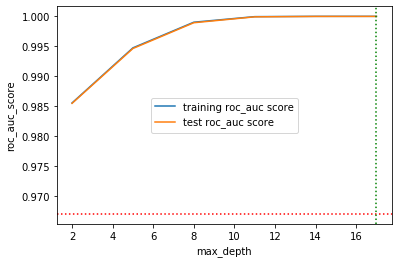

In [152]:
# plotting roc_auc score with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_depth")
plt.ylabel("roc_auc_score")
plt.axhline(y=0.967,color='r',ls='dotted')
plt.axvline(x=17,color='g',ls='dotted')
plt.legend()
plt.show()

We narrow down the range now.

In [153]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': [10,11,12]}

# instantiate the model
rf = RandomForestClassifier(random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
rf.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:  3.7min remaining: 12.9min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  3.8min remaining:  7.6min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  3.9min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:  4.0min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  4.1min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  4.2min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  5.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  5.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [154]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

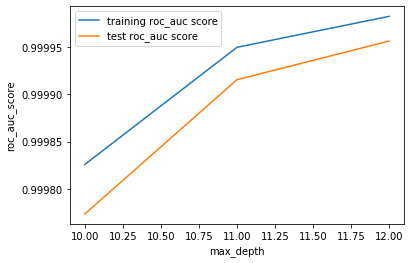

In [155]:
# plotting roc_auc score with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_depth")
plt.ylabel("roc_auc_score")
plt.legend()
plt.show()

Optimal results are observed with max_depth=12.

### Tuning max_features

In [150]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [4, 8, 12, 16, 20, 24, 28]}

# instantiate the model
rf = RandomForestClassifier(max_depth=12,random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed: 13.3min remaining: 17.8min
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed: 19.4min remaining: 14.5min
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed: 25.2min remaining: 10.1min
[Parallel(n_jobs=-1)]: Done  18 out of  21 | elapsed: 32.0min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 36.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 36.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=12,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                   

In [151]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

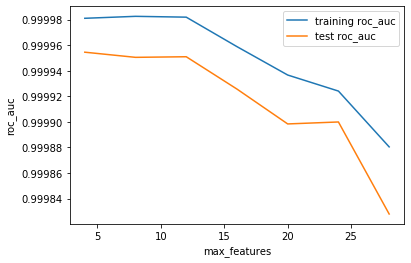

In [152]:
# plotting roc_auc with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("max_features")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Best results are observed max_features=4.

### Tuning min_samples_leaf

In [163]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=12,max_features=4,random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:  6.6min remaining:  6.6min
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed:  6.7min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:  9.7min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed:  9.7min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  9.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  9.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=12,
                                              max_features=4,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                        

In [164]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

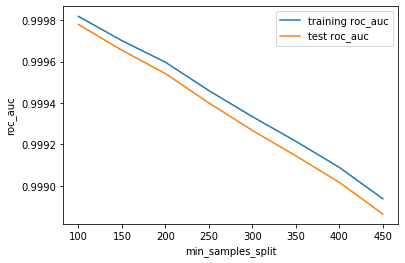

In [167]:
# plotting roc_auc with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Best results are observed with min_samples_split=100.

In [168]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': [80,90,100,110]}

# instantiate the model
rf = RandomForestClassifier(max_depth=12,max_features=4,random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:  3.8min remaining: 11.5min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:  3.9min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:  3.9min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  6.0min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  6.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=12,
                                              max_features=4,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                        

In [169]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

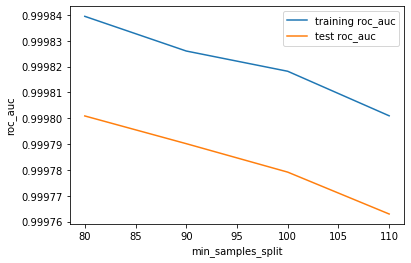

In [170]:
# plotting roc_auc with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

In [171]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': [20,40,60,80]}

# instantiate the model
rf = RandomForestClassifier(max_depth=12,max_features=4,random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:  3.6min remaining: 10.7min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:  3.6min remaining:  5.1min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:  3.7min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  5.7min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  5.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=12,
                                              max_features=4,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                        

In [172]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

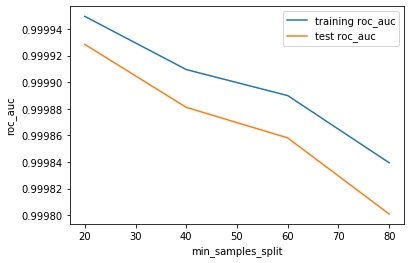

In [173]:
# plotting roc_auc with max_features
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_leaf")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

The best results are observed with min_samples_split=20.

### Tuning min_samples_split

In [179]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=12,max_features=4,min_samples_leaf=20,random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:  7.0min remaining:  7.0min
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed:  7.0min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed: 10.3min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed: 10.4min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 10.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 10.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=12,
                                              max_features=4,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=20,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                       

In [180]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

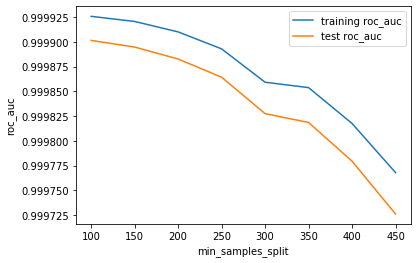

In [181]:
# plotting roc_auc with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

In [182]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': [20,40,60,80,100]}

# instantiate the model
rf = RandomForestClassifier(max_depth=12,max_features=4,min_samples_leaf=20,random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
rf.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  3.5min remaining: 22.6min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  3.5min remaining:  9.6min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  3.6min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  3.6min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  6.7min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  6.7min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=12,
                                              max_features=4,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=20,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                       

In [183]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

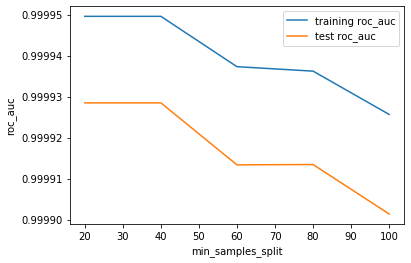

In [184]:
# plotting roc_auc with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Best results are observed with min_samples_split=20.

### Grid Search to find optimal parameters

In [185]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'min_samples_leaf': [10,20,30],
    'min_samples_split': [10,20,30], 
}
# Create a based model
rf = RandomForestClassifier(max_depth=12,max_features=4,random_state=100)
# Instantiate the grid search model
rf = GridSearchCV(estimator = rf, param_grid = param_grid,scoring='roc_auc',
                          cv = 3, n_jobs = -1,verbose = 10)

rf.fit(X_train_res,y_train_res)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  15 out of  27 | elapsed:  6.8min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed: 10.0min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done  21 out of  27 | elapsed: 10.1min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed: 10.2min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 11.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 11.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=12,
                                              max_features=4,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                        

In [186]:
# printing the optimal recall score and hyperparameters
print('We can get best roc_auc of',rf.best_score_,'using',rf.best_params_)

We can get best roc_auc of 0.9999425773871106 using {'min_samples_leaf': 10, 'min_samples_split': 30}


In [303]:
rf3=RandomForestClassifier(max_depth=12,max_features=4,min_samples_leaf=10,min_samples_split=30,random_state=100)
rf3.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [304]:
y_train_prob=rf3.predict_proba(X_train_res)[:,1]

In [305]:
rf3_df=pd.DataFrame()
rf3_df['Fraud']=y_train_res
rf3_df['Fraud_prob']=y_train_prob

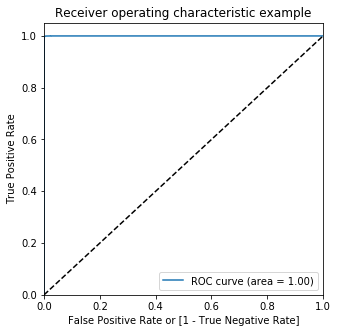

In [306]:
draw_roc(rf3_df.Fraud, rf3_df.Fraud_prob)

In [307]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    rf3_df[i]= rf3_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
rf3_df.head()

,Fraud,Fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.003562,1,0,0,0,0,0,0,0,0,0
1,0,0.012820,1,0,0,0,0,0,0,0,0,0
2,0,0.004959,1,0,0,0,0,0,0,0,0,0
3,0,0.006160,1,0,0,0,0,0,0,0,0,0
4,0,0.017869,1,0,0,0,0,0,0,0,0,0


In [308]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(rf3_df.Fraud, rf3_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

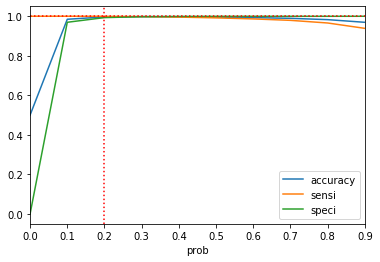

In [311]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.2,color='r',ls='dotted')
plt.axhline(y=1,color='r',ls='dotted')
plt.show()

In [312]:
p, r, thresholds = precision_recall_curve(rf3_df.Fraud, rf3_df.Fraud_prob)

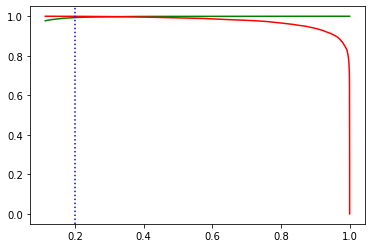

In [314]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.2,color='b',ls='dotted')
plt.show()

In [315]:
rf3_df['Final_Pred']=rf3_df.Fraud_prob.map( lambda x: 1 if x > 0.2 else 0)

In [316]:
cmf=metrics.confusion_matrix(rf3_df['Fraud'],rf3_df['Final_Pred'])

In [317]:
cmf

array([[197656,   1364],
       [    84, 198936]], dtype=int64)

In [318]:
tr_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

### Prediction on Test Set

In [319]:
#Creating a DataFrame of the original target variable and Fraud Probability 
y_test_pred=rf3.predict_proba(X_test)[:,1]
y_test_pred_final = pd.DataFrame({'Fraud':y_test.values, 'Fraud_prob':y_test_pred})

In [320]:
y_test_pred_final['Final_Pred'] = y_test_pred_final.Fraud_prob.map(lambda x: 1 if x > 0.2 else 0)

In [321]:
cmf=metrics.confusion_matrix(y_test_pred_final['Fraud'],y_test_pred_final['Final_Pred'])

In [322]:
cmf

array([[84612,   683],
       [   20,   128]], dtype=int64)

In [323]:
te_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

In [324]:
mr.loc['Random Forest with SMOTE','Training Accuracy']=metrics.accuracy_score(rf3_df.Fraud,rf3_df.Final_Pred)
mr.loc['Random Forest with SMOTE','Test Accuracy']=metrics.accuracy_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Random Forest with SMOTE','Training Recall']=metrics.recall_score(rf3_df.Fraud,rf3_df.Final_Pred)
mr.loc['Random Forest with SMOTE','Test Recall']=metrics.recall_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Random Forest with SMOTE','Training Precision']=metrics.precision_score(rf3_df.Fraud,rf3_df.Final_Pred)
mr.loc['Random Forest with SMOTE','Test Precision']=metrics.precision_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Random Forest with SMOTE','Training f1_score']=metrics.f1_score(rf3_df.Fraud,rf3_df.Final_Pred)
mr.loc['Random Forest with SMOTE','Test f1_score']=metrics.f1_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Random Forest with SMOTE','Training Specificity']=tr_sp
mr.loc['Random Forest with SMOTE','Test Specificity']=te_sp

In [325]:
mr

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision,Training Specificity,Test Specificity,Training f1_score,Test f1_score
Logistic Regression-l1 regularized with no sampling,0.999333,0.999111,0.811047,0.777027,0.804035,0.727848,0.999658,0.999496,0.807525,0.751634
Random Forest with no sampling,0.999318,0.999052,0.805233,0.763514,0.800578,0.710692,0.999653,0.999461,0.802899,0.736156
Decision Tree without Sampling,0.999318,0.998982,0.755814,0.682432,0.833333,0.716312,0.999739,0.999531,0.792683,0.698962
XGBoost with no sampling,0.999463,0.999263,0.851744,0.837838,0.839542,0.760736,0.999719,0.999543,0.845599,0.797428
Logistic Regression-l1 regularized with random over sampling,0.946900,0.948047,0.946493,0.912162,0.947264,0.029599,0.947307,0.948110,0.946878,0.057337
Random Forest with random over sampling,0.998364,0.999204,0.996865,0.655405,0.999864,0.850877,0.999864,0.999801,0.998362,0.740458
Decision Tree with Random Over Sampling,0.999689,0.999192,0.924419,0.797297,0.898305,0.751592,0.999819,0.999543,0.911175,0.773770
XGBoost with Random Over Sampling,1.000000,0.999520,1.000000,0.777027,1.000000,0.934959,1.000000,0.999906,1.000000,0.848708
Logistic Regression-l1 regularized with SMOTE,0.966938,0.966317,0.967968,0.885135,0.965978,0.043783,0.965908,0.966458,0.966972,0.083439
Random Forest with SMOTE,0.996362,0.991772,0.999578,0.864865,0.993190,0.157830,0.993146,0.991992,0.996374,0.266945


## Decision Tree Classifier

### Tuning max_depth

In [125]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 3)}

# instantiate the model
dt = DecisionTreeClassifier(random_state=100)


# fit tree on training data
dt = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
dt.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:   18.9s remaining:   49.3s
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:   21.5s remaining:   33.9s
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:   28.2s remaining:   28.2s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:   36.1s remaining:   22.9s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:   43.2s remaining:   16.5s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   46.1s remaining:    9.1s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   53.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 3)}, pre_dispatch='2*n_jobs',


In [126]:
scores=pd.DataFrame(dt.cv_results_)

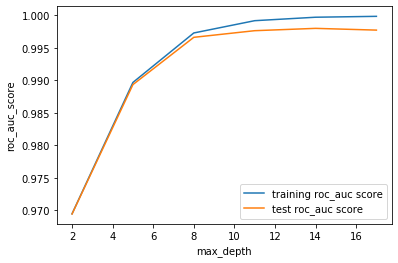

In [127]:
# plotting roc_auc score with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_depth")
plt.ylabel("roc_auc_score")
plt.legend()
plt.show()

Optimal max_depth=8.

### Tuning min_samples_split

In [128]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': [50,100,150,200,250,300,350,400]}

# instantiate the model
dt = DecisionTreeClassifier(max_depth=8,random_state=100)


# fit tree on training data
dt = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
dt.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:   29.7s remaining:   29.7s
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed:   32.6s remaining:   19.5s
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:   43.4s remaining:   14.4s
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed:   45.8s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   47.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   47.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=8,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_samples_split': [50, 100, 150, 200, 250, 300, 350,
   

In [129]:
# scores of GridSearch CV
scores = pd.DataFrame(dt.cv_results_)

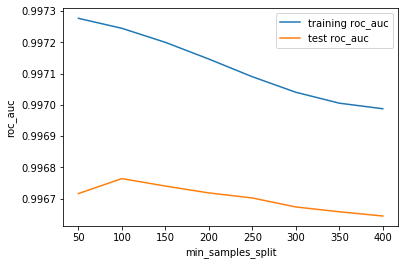

In [130]:
# plotting roc_auc with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal min_samples_split=100.

In [326]:
dt3=DecisionTreeClassifier(max_depth=8,min_samples_split=100,random_state=100)
dt3.fit(X_train_res,y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [327]:
y_train_prob=dt3.predict_proba(X_train_res)[:,1]

In [328]:
dt3_df=pd.DataFrame()
dt3_df['Fraud']=y_train_res
dt3_df['Fraud_prob']=y_train_prob

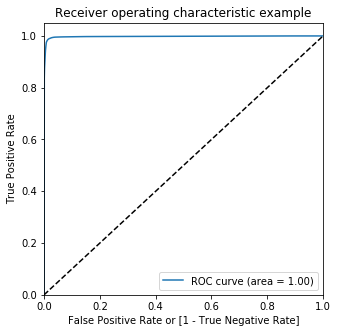

In [329]:
draw_roc(dt3_df.Fraud, dt3_df.Fraud_prob)

In [330]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    dt3_df[i]= dt3_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
dt3_df.head()

,Fraud,Fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.003208,1,0,0,0,0,0,0,0,0,0
1,0,0.000496,1,0,0,0,0,0,0,0,0,0
2,0,0.003208,1,0,0,0,0,0,0,0,0,0
3,0,0.003208,1,0,0,0,0,0,0,0,0,0
4,0,0.015270,1,0,0,0,0,0,0,0,0,0


In [331]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(dt3_df.Fraud, dt3_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

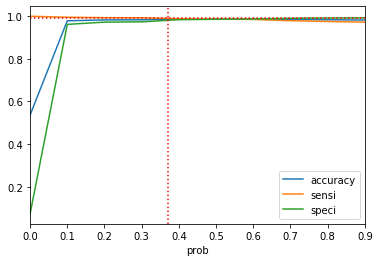

In [334]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.37,color='r',ls='dotted')
plt.axhline(y=0.99,color='r',ls='dotted')
plt.show()

In [335]:
p, r, thresholds = precision_recall_curve(dt3_df.Fraud, dt3_df.Fraud_prob)

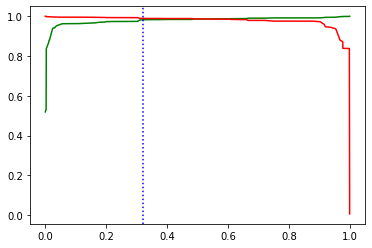

In [336]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.32,color='b',ls='dotted')
plt.show()

Optimal threshold is chosen as 0.32

In [337]:
dt3_df['Final_Pred']=dt3_df.Fraud_prob.map( lambda x: 1 if x > 0.32 else 0)

In [338]:
cmf=metrics.confusion_matrix(dt3_df['Fraud'],dt3_df['Final_Pred'])

In [339]:
cmf

array([[195598,   3422],
       [  2201, 196819]], dtype=int64)

In [340]:
tr_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

### Predicting on Test Set

In [341]:
#Creating a DataFrame of the original target variable and Fraud Probability 
y_test_pred=dt3.predict_proba(X_test)[:,1]
y_test_pred_final = pd.DataFrame({'Fraud':y_test.values, 'Fraud_prob':y_test_pred})

In [342]:
y_test_pred_final['Final_Pred'] = y_test_pred_final.Fraud_prob.map(lambda x: 1 if x > 0.32 else 0)

In [343]:
cmf=metrics.confusion_matrix(y_test_pred_final['Fraud'],y_test_pred_final['Final_Pred'])

In [344]:
cmf

array([[83721,  1574],
       [   23,   125]], dtype=int64)

In [345]:
te_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

In [346]:
mr.loc['Decision Tree with SMOTE','Training Accuracy']=metrics.accuracy_score(dt3_df.Fraud,dt3_df.Final_Pred)
mr.loc['Decision Tree with SMOTE','Test Accuracy']=metrics.accuracy_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Decision Tree with SMOTE','Training Recall']=metrics.recall_score(dt3_df.Fraud,dt3_df.Final_Pred)
mr.loc['Decision Tree with SMOTE','Test Recall']=metrics.recall_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Decision Tree with SMOTE','Training Precision']=metrics.precision_score(dt3_df.Fraud,dt3_df.Final_Pred)
mr.loc['Decision Tree with SMOTE','Test Precision']=metrics.precision_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Decision Tree with SMOTE','Training f1_score']=metrics.f1_score(dt3_df.Fraud,dt3_df.Final_Pred)
mr.loc['Decision Tree with SMOTE','Test f1_score']=metrics.f1_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Decision Tree with SMOTE','Training Specificity']=tr_sp
mr.loc['Decision Tree with SMOTE','Test Specificity']=te_sp

In [347]:
mr

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision,Training Specificity,Test Specificity,Training f1_score,Test f1_score
Logistic Regression-l1 regularized with no sampling,0.999333,0.999111,0.811047,0.777027,0.804035,0.727848,0.999658,0.999496,0.807525,0.751634
Random Forest with no sampling,0.999318,0.999052,0.805233,0.763514,0.800578,0.710692,0.999653,0.999461,0.802899,0.736156
Decision Tree without Sampling,0.999318,0.998982,0.755814,0.682432,0.833333,0.716312,0.999739,0.999531,0.792683,0.698962
XGBoost with no sampling,0.999463,0.999263,0.851744,0.837838,0.839542,0.760736,0.999719,0.999543,0.845599,0.797428
Logistic Regression-l1 regularized with random over sampling,0.946900,0.948047,0.946493,0.912162,0.947264,0.029599,0.947307,0.948110,0.946878,0.057337
Random Forest with random over sampling,0.998364,0.999204,0.996865,0.655405,0.999864,0.850877,0.999864,0.999801,0.998362,0.740458
Decision Tree with Random Over Sampling,0.999689,0.999192,0.924419,0.797297,0.898305,0.751592,0.999819,0.999543,0.911175,0.773770
XGBoost with Random Over Sampling,1.000000,0.999520,1.000000,0.777027,1.000000,0.934959,1.000000,0.999906,1.000000,0.848708
Logistic Regression-l1 regularized with SMOTE,0.966938,0.966317,0.967968,0.885135,0.965978,0.043783,0.965908,0.966458,0.966972,0.083439
Random Forest with SMOTE,0.996362,0.991772,0.999578,0.864865,0.993190,0.157830,0.993146,0.991992,0.996374,0.266945


## XGBoost

### Tuning max_depth

In [215]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 3)}

# instantiate the model
xgm = XGBClassifier(tree_method='hist',random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
xgm.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:   34.8s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:   47.8s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:   52.4s remaining:   52.4s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:  1.1min remaining:   43.7s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  1.3min remaining:   30.2s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  1.5min remaining:   17.7s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 3)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_s

In [216]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

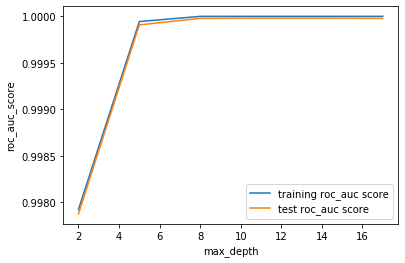

In [217]:
# plotting roc_auc score with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_depth")
plt.ylabel("roc_auc_score")
plt.legend()
plt.show()

max_depth=8 looks optimal. We further fine tune.

In [218]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': [7,8,9]}

# instantiate the model
xgm = XGBClassifier(tree_method='hist',random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
xgm.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:   28.5s remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   28.6s remaining:   57.3s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   31.1s remaining:   38.9s
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:   31.6s remaining:   25.3s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:   31.9s remaining:   15.9s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:   32.4s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   43.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   43.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1, param_grid={'max_depth': [7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
        

In [219]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

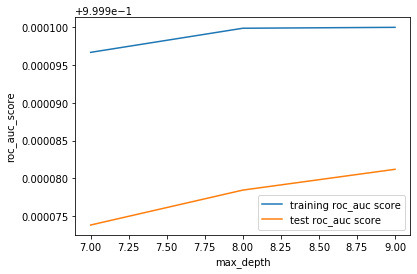

In [220]:
# plotting roc_auc score with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_depth")
plt.ylabel("roc_auc_score")
plt.legend()
plt.show()

Optimal results are observed with max_depth=9.

### Tuning n_estimators

In [221]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
xgm = XGBClassifier(max_depth=9,tree_method='hist',random_state=100) 


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
xgm.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:   35.9s remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:  1.9min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:  2.4min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  2.8min remaining:   56.3s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  3.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=9, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': range(100, 1500, 400)},
             pre_dispatch='2*n_jobs', refit=True, retur

In [222]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

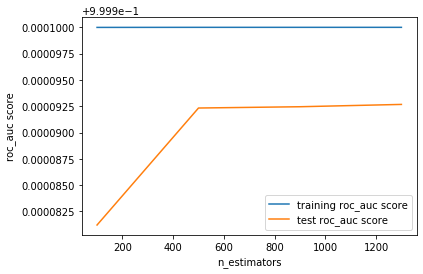

In [223]:
# plotting roc_auc with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("n_estimators")
plt.ylabel("roc_auc score")
plt.legend()
plt.show()

Best results are observed when n_estimators=500.

In [224]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': [400,500,600]}

# instantiate the model (note we are specifying a max_depth)
xgm = XGBClassifier(max_depth=9,tree_method='hist',random_state=100) 


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
xgm.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:  1.9min remaining:  6.8min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  2.0min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  2.1min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:  2.1min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  2.1min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  2.2min remaining:   37.9s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=9, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': [400, 500, 600]},
             pre_dispatch='2*n_jobs', refit=True, return_trai

In [225]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

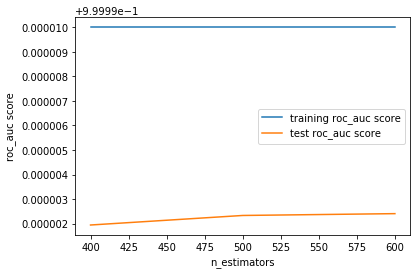

In [226]:
# plotting roc_auc with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("n_estimators")
plt.ylabel("roc_auc score")
plt.legend()
plt.show()

There is hardly any improvement from 500 to 600. Therefore, we choose 500 as n_estimators.

### Tuning min_child_weight

In [227]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_child_weight': [1,4,7,10,13]}

# instantiate the model
xgm = XGBClassifier(max_depth=9,n_estimators=500,tree_method='hist',random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  1.7min remaining: 11.2min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  1.8min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  2.0min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  2.0min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  3.2min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  3.2min remaining:   48.2s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=9, min_child_weight=1,
                                     missing=None, n_estimators=500, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_child_weight': [1, 4, 7, 10, 13]},
             pre_dispatch='2*n_jobs', refit=True, retur

In [228]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

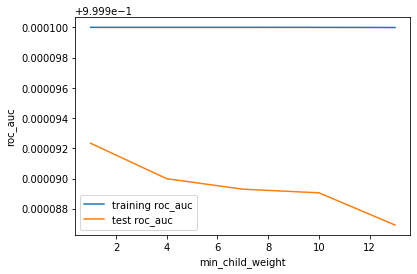

In [229]:
# plotting roc_auc with min_child_weight
plt.figure()
plt.plot(scores["param_min_child_weight"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_child_weight"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_child_weight")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal results are obtained with min_child_weight=1.

In [230]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_child_weight': [1,2,3]}

# instantiate the model
xgm = XGBClassifier(max_depth=9,n_estimators=500,tree_method='hist',random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:  1.8min remaining:  6.2min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  1.8min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  1.8min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:  1.9min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  1.9min remaining:   57.2s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  1.9min remaining:   32.7s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=9, min_child_weight=1,
                                     missing=None, n_estimators=500, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_child_weight': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_

In [231]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

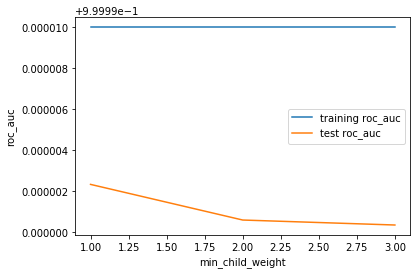

In [232]:
# plotting roc_auc with min_child_weight
plt.figure()
plt.plot(scores["param_min_child_weight"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_child_weight"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_child_weight")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal results are observed with min_child_weight=1.

### Tuning gamma

In [233]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'gamma': [0.1,0.2,0.3,0.4,0.5]}

# instantiate the model
xgm = XGBClassifier(max_depth=9,min_child_weight=1,n_estimators=500,tree_method='hist',random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  2.0min remaining: 12.8min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  2.0min remaining:  5.6min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  2.1min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  2.2min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  3.9min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  4.0min remaining:   59.3s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=9, min_child_weight=1,
                                     missing=None, n_estimators=500, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.1, 0.2, 0.3, 0.4, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_t

In [234]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

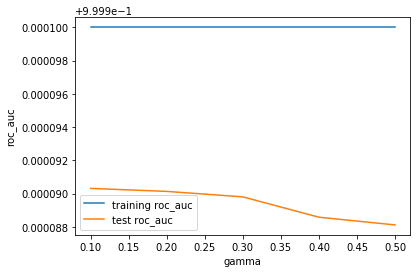

In [235]:
# plotting roc_auc with gamma
plt.figure()
plt.plot(scores["param_gamma"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_gamma"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("gamma")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal results are observed with gamma=0.1.

In [236]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'gamma': [0.001,0.01,0.1]}

# instantiate the model
xgm = XGBClassifier(max_depth=9,min_child_weight=1,n_estimators=500,tree_method='hist',random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:  1.9min remaining:  6.7min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:  1.9min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  2.0min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:  2.0min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  2.0min remaining:   59.0s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  2.0min remaining:   33.7s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=9, min_child_weight=1,
                                     missing=None, n_estimators=500, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.001, 0.01, 0.1]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_sc

In [237]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

In [239]:
xgm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='hist', verbosity=1)

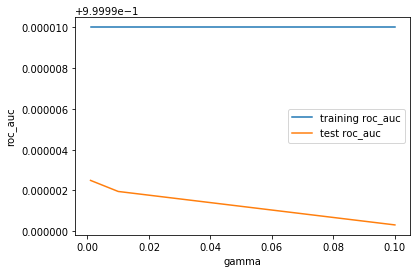

In [238]:
# plotting roc_auc with gamma
plt.figure()
plt.plot(scores["param_gamma"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_gamma"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("gamma")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Best results are observed with gamma=0.001.

### Tuning regularization parameters

In [240]:
#specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'reg_alpha': [0.001,0.01,0.1,0.4,0.8]}

# instantiate the model
xgm = XGBClassifier(max_depth=9,gamma=0.001,min_child_weight=1,n_estimators=500,tree_method='hist',random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  1.8min remaining: 11.8min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  1.9min remaining:  5.1min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  1.9min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  1.9min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  3.5min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  3.6min remaining:   53.4s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0.001,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=9, min_child_weight=1,
                                     missing=None, n_estimators=500, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'reg_alpha': [0.001, 0.01, 0.1, 0.4, 0.8]},
             pre_dispatch='2*n_jobs', refit=Tru

In [241]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

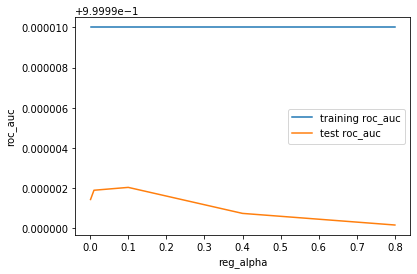

In [242]:
# plotting roc_auc with min_samples_split
plt.figure()
plt.plot(scores["param_reg_alpha"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_reg_alpha"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("reg_alpha")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

In [243]:
xgm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='hist', verbosity=1)

Optimal results are observed with reg_alpha=0.1

### Tuning learning_rate

In [244]:
#specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'learning_rate': [0.001,0.01,0.1,0.4,0.6,0.8]}

# instantiate the model
xgm = XGBClassifier(max_depth=9,gamma=0.001,min_child_weight=1,n_estimators=500,reg_alpha=0.1,tree_method='hist',random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:  3.6min remaining:  9.3min
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:  3.6min remaining:  5.6min
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:  3.6min remaining:  3.6min
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:  4.1min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  4.4min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  4.5min remaining:   54.4s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  4.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0.001,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=9, min_child_weight=1,
                                     missing=None, n_estimators=500, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0.1,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.4, 0.6, 0.8]},
             pre_dispatch='2*n_jobs'

In [245]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

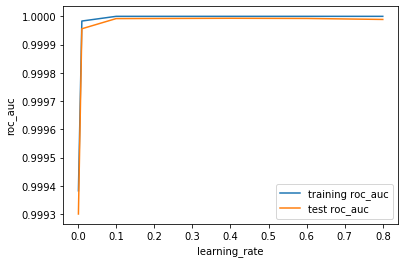

In [246]:
# plotting roc_auc with min_samples_split
plt.figure()
plt.plot(scores["param_learning_rate"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_learning_rate"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("learning_rate")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

In [247]:
xgm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001,
              learning_rate=0.4, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='hist', verbosity=1)

Optimal results are observed around learning_rate=0.4

In [248]:
#specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'learning_rate': [0.3,0.35,0.4,0.45,0.5]}

# instantiate the model
xgm = XGBClassifier(max_depth=9,gamma=0.001,min_child_weight=1,n_estimators=500,reg_alpha=0.1,tree_method='hist',random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  1.3min remaining:  8.6min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  1.4min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  1.4min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  1.5min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  2.3min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  2.4min remaining:   35.6s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0.001,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=9, min_child_weight=1,
                                     missing=None, n_estimators=500, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0.1,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.35, 0.4, 0.45, 0.5]},
             pre_dispatch='2*n_jobs', refi

In [249]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

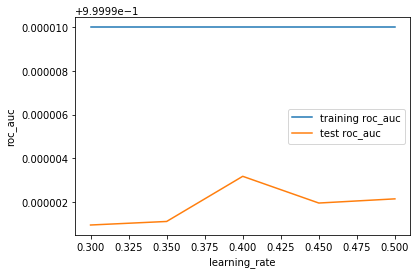

In [250]:
# plotting roc_auc with min_samples_split
plt.figure()
plt.plot(scores["param_learning_rate"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_learning_rate"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("learning_rate")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal learning_rate=0.4

### Grid Search to find optimal hyperparameters

In [251]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': [9,10,11],
              'min_child_weight': [1,2],
              'reg_alpha': [0.1,0.2],
              'gamma': [0.0001,0.001]
             }

# instantiate the model
xgm = XGBClassifier(n_estimators=500,learning_rate=0.4,tree_method='hist',random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  65 out of  72 | elapsed:  9.2min remaining:   59.3s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  9.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.4, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=500, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.0001, 0.001], 'max_depth': [9, 10, 11],
                         'min_child_weight'

In [252]:
# printing the optimal recall score and hyperparameters
print('We can get best roc_auc of',xgm.best_score_,'using',xgm.best_params_)

We can get best roc_auc of 0.9999931814292203 using {'gamma': 0.001, 'max_depth': 9, 'min_child_weight': 1, 'reg_alpha': 0.1}


In [348]:
xgm3=XGBClassifier(max_depth=9,reg_alpha=0.1,gamma=0.001,min_child_weight=1,n_estimators=500,learning_rate=0.4,
                   tree_method='hist',random_state=100)

In [349]:
xgm3.fit(X_train_res,y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001,
              learning_rate=0.4, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='hist', verbosity=1)

In [350]:
y_train_prob=xgm3.predict_proba(X_train_res)[:,1]

In [351]:
xgm3_df=pd.DataFrame()
xgm3_df['Fraud']=y_train_res
xgm3_df['Fraud_prob']=y_train_prob

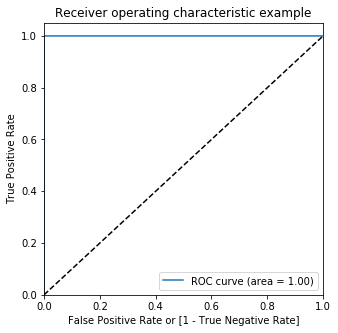

In [352]:
draw_roc(xgm3_df.Fraud, xgm3_df.Fraud_prob)

In [353]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    xgm3_df[i]= xgm3_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
xgm3_df.head()

,Fraud,Fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,9.316135e-09,1,0,0,0,0,0,0,0,0,0
1,0,4.393161e-07,1,0,0,0,0,0,0,0,0,0
2,0,4.612094e-09,1,0,0,0,0,0,0,0,0,0
3,0,1.712983e-08,1,0,0,0,0,0,0,0,0,0
4,0,2.032293e-07,1,0,0,0,0,0,0,0,0,0


In [354]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(xgm3_df.Fraud, xgm3_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

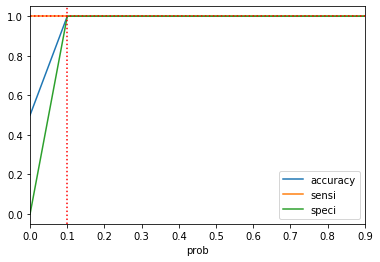

In [355]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.1,color='r',ls='dotted')
plt.axhline(y=1,color='r',ls='dotted')
plt.show()

In [356]:
p, r, thresholds = precision_recall_curve(xgm3_df.Fraud, xgm3_df.Fraud_prob)

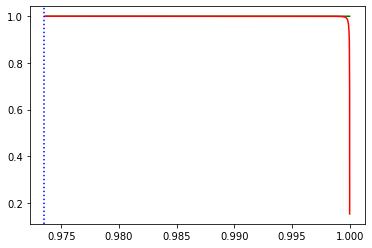

In [357]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.9735,color='b',ls='dotted')
plt.show()

In [363]:
xgm3_df['Final_Pred']=xgm3_df.Fraud_prob.map( lambda x: 1 if x > 0.9735 else 0)

In [364]:
cmf=metrics.confusion_matrix(xgm3_df['Fraud'],xgm3_df['Final_Pred'])

In [365]:
cmf

array([[199020,      0],
       [     0, 199020]], dtype=int64)

In [366]:
tr_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

### Predicitng on Test Set

In [367]:
#Creating a DataFrame of the original target variable and Fraud Probability 
y_test_pred=xgm3.predict_proba(X_test)[:,1]
y_test_pred_final = pd.DataFrame({'Fraud':y_test.values, 'Fraud_prob':y_test_pred})

In [368]:
y_test_pred_final['Final_Pred'] = y_test_pred_final.Fraud_prob.map(lambda x: 1 if x > 0.9735 else 0)

In [369]:
cmf=metrics.confusion_matrix(y_test_pred_final['Fraud'],y_test_pred_final['Final_Pred'])

In [370]:
cmf

array([[85281,    14],
       [   28,   120]], dtype=int64)

In [371]:
te_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

In [372]:
mr.loc['XGBoost with SMOTE','Training Accuracy']=metrics.accuracy_score(xgm3_df.Fraud,xgm3_df.Final_Pred)
mr.loc['XGBoost with SMOTE','Test Accuracy']=metrics.accuracy_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['XGBoost with SMOTE','Training Recall']=metrics.recall_score(xgm3_df.Fraud,xgm3_df.Final_Pred)
mr.loc['XGBoost with SMOTE','Test Recall']=metrics.recall_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['XGBoost with SMOTE','Training Precision']=metrics.precision_score(xgm3_df.Fraud,xgm3_df.Final_Pred)
mr.loc['XGBoost with SMOTE','Test Precision']=metrics.precision_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['XGBoost with SMOTE','Training f1_score']=metrics.f1_score(xgm3_df.Fraud,xgm3_df.Final_Pred)
mr.loc['XGBoost with SMOTE','Test f1_score']=metrics.f1_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['XGBoost with SMOTE','Training Specificity']=tr_sp
mr.loc['XGBoost with SMOTE','Test Specificity']=te_sp

In [373]:
mr

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision,Training Specificity,Test Specificity,Training f1_score,Test f1_score
Logistic Regression-l1 regularized with no sampling,0.999333,0.999111,0.811047,0.777027,0.804035,0.727848,0.999658,0.999496,0.807525,0.751634
Random Forest with no sampling,0.999318,0.999052,0.805233,0.763514,0.800578,0.710692,0.999653,0.999461,0.802899,0.736156
Decision Tree without Sampling,0.999318,0.998982,0.755814,0.682432,0.833333,0.716312,0.999739,0.999531,0.792683,0.698962
XGBoost with no sampling,0.999463,0.999263,0.851744,0.837838,0.839542,0.760736,0.999719,0.999543,0.845599,0.797428
Logistic Regression-l1 regularized with random over sampling,0.946900,0.948047,0.946493,0.912162,0.947264,0.029599,0.947307,0.948110,0.946878,0.057337
Random Forest with random over sampling,0.998364,0.999204,0.996865,0.655405,0.999864,0.850877,0.999864,0.999801,0.998362,0.740458
Decision Tree with Random Over Sampling,0.999689,0.999192,0.924419,0.797297,0.898305,0.751592,0.999819,0.999543,0.911175,0.773770
XGBoost with Random Over Sampling,1.000000,0.999520,1.000000,0.777027,1.000000,0.934959,1.000000,0.999906,1.000000,0.848708
Logistic Regression-l1 regularized with SMOTE,0.966938,0.966317,0.967968,0.885135,0.965978,0.043783,0.965908,0.966458,0.966972,0.083439
Random Forest with SMOTE,0.996362,0.991772,0.999578,0.864865,0.993190,0.157830,0.993146,0.991992,0.996374,0.266945


## Adaptive Synthesis Sampling

In [374]:
from imblearn.over_sampling import ADASYN

In [375]:
#training set
print("Before OverSampling, counts of label '1' in training set: {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0' in training set: {} \n".format(sum(y_train == 0))) 

print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 

sm2 = ADASYN(random_state = 2) 
X_train_res2, y_train_res2 = sm2.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res2.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res2.shape)) 
  
print("After OverSampling, counts of label '1' in training set: {}".format(sum(y_train_res2 == 1))) 
print("After OverSampling, counts of label '0' in training set: {}".format(sum(y_train_res2 == 0))) 

Before OverSampling, counts of label '1' in training set: 344
Before OverSampling, counts of label '0' in training set: 199020 

Before OverSampling, the shape of train_X: (199364, 29)
Before OverSampling, the shape of train_y: (199364,) 

After OverSampling, the shape of train_X: (398064, 29)
After OverSampling, the shape of train_y: (398064,) 

After OverSampling, counts of label '1' in training set: 199044
After OverSampling, counts of label '0' in training set: 199020


In our previous experiments, we have observed that XGBoost performs the best. Therefore, we start with XGBoost.

## XGBoost

### Tuning max_depth

In [161]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 3)}

# instantiate the model
xgm = XGBClassifier(tree_method='hist',random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
xgm.fit(X_train_res2, y_train_res2)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:   34.1s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:   45.2s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:   57.0s remaining:   57.0s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:  1.1min remaining:   41.8s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  1.2min remaining:   28.0s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  1.4min remaining:   16.5s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 3)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_s

In [162]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

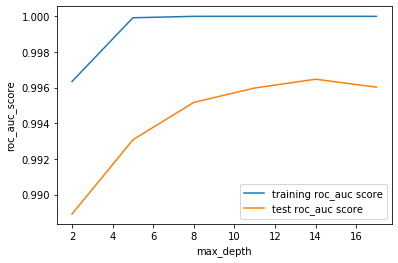

In [163]:
# plotting roc_auc score with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_depth")
plt.ylabel("roc_auc_score")
plt.legend()
plt.show()

Optimal results are obtained with max_depth around 14. We further fine tune the model.

In [164]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': [13,14,15]}

# instantiate the model
xgm = XGBClassifier(tree_method='hist',random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
xgm.fit(X_train_res2, y_train_res2)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:   48.0s remaining:  2.8min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   50.0s remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   50.3s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:   52.0s remaining:   41.6s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:   52.5s remaining:   26.2s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:   52.7s remaining:   15.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [13, 14, 15]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_scor

In [165]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

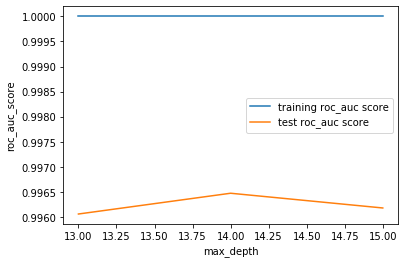

In [166]:
# plotting roc_auc score with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_depth")
plt.ylabel("roc_auc_score")
plt.legend()
plt.show()

Optimal results are observed with max_depth-14.

### Tuning n_estimators

In [167]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
xgm = XGBClassifier(max_depth=14,tree_method='hist',random_state=100) 


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                 return_train_score=True,n_jobs=-1,verbose=10)
xgm.fit(X_train_res2, y_train_res2)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:   52.6s remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:  2.0min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:  2.6min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  3.1min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  3.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=14, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_estimators': range(100, 1500, 400)},
             pre_dispatch='2*n_jobs', refit=True, retu

In [168]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

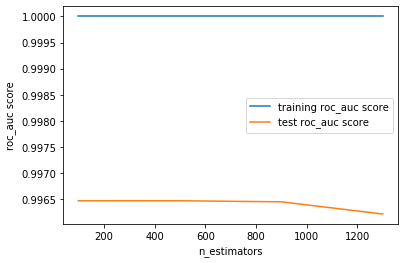

In [169]:
# plotting roc_auc with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("n_estimators")
plt.ylabel("roc_auc score")
plt.legend()
plt.show()

Optimal results are observed when n_estimators=100.

### Tuning min_child_weight

In [170]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_child_weight': [1,4,7,10,13]}

# instantiate the model
xgm = XGBClassifier(max_depth=14,n_estimators=100,tree_method='hist',random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train_res2, y_train_res2)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:   42.9s remaining:  4.7min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:   46.9s remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:   49.0s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   51.0s remaining:   44.6s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  1.3min remaining:   38.0s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  1.3min remaining:   19.5s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=14, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'min_child_weight': [1, 4, 7, 10, 13]},
             pre_dispatch='2*n_jobs', refit=True, retu

In [171]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

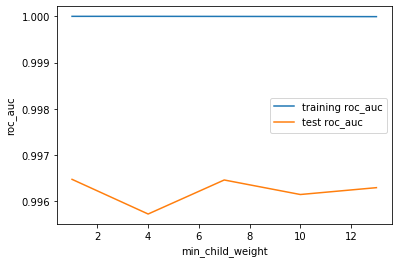

In [172]:
# plotting roc_auc with min_child_weight
plt.figure()
plt.plot(scores["param_min_child_weight"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_min_child_weight"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("min_child_weight")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal value for min_child_weight=1.

### Tuning gamma

In [174]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'gamma': [0.1,0.2,0.3,0.4,0.5]}

# instantiate the model
xgm = XGBClassifier(max_depth=14,min_child_weight=1,n_estimators=100,tree_method='hist',random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train_res2, y_train_res2)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:   44.3s remaining:  4.8min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:   48.1s remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:   48.8s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   49.9s remaining:   43.6s
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  1.3min remaining:   40.4s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  1.4min remaining:   20.8s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=14, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.1, 0.2, 0.3, 0.4, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_

In [175]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

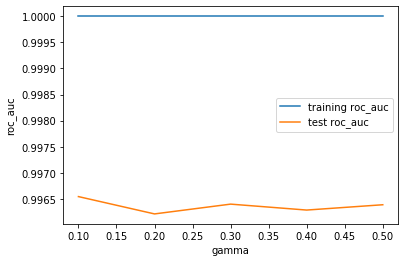

In [176]:
# plotting roc_auc with gamma
plt.figure()
plt.plot(scores["param_gamma"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_gamma"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("gamma")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

Optimal results are observed with gamma=0.1

### Tuning regularization parameters

In [564]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'reg_alpha': [0.001,0.01,0.1,0.4,0.8]}

# instantiate the model
xgm = XGBClassifier(max_depth=10,gamma=0.0001,min_child_weight=1,n_estimators=500,tree_method='hist',random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train_res2, y_train_res2)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  1.9min remaining: 12.2min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  1.9min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  1.9min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  2.0min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  3.6min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  3.6min remaining:   53.8s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0.0001,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=10, min_child_weight=1,
                                     missing=None, n_estimators=500, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'reg_alpha': [0.001, 0.01, 0.1, 0.4, 0.8]},
             pre_dispatch='2*n_jobs', refit=T

In [565]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

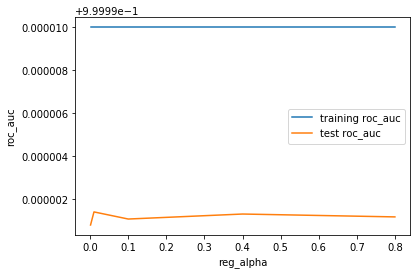

In [566]:
# plotting roc_auc with min_samples_split
plt.figure()
plt.plot(scores["param_reg_alpha"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_reg_alpha"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("reg_alpha")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

In [567]:
xgm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0001,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='hist', verbosity=1)

Optimal reg_alpha=0.01

### Tuning learning_rate

In [568]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'learning_rate': [0.001,0.01,0.1,0.4,0.8]}

# instantiate the model
xgm = XGBClassifier(max_depth=10,gamma=0.0001,reg_alpha=0.01,min_child_weight=1,n_estimators=500,tree_method='hist',random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train_res2, y_train_res2)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed:  2.0min remaining: 12.8min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  4.0min remaining: 11.1min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:  4.5min remaining:  6.7min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  4.6min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  4.7min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  5.1min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  5.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0.0001,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=10, min_child_weight=1,
                                     missing=None, n_estimators=500, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0.01,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.4, 0.8]},
             pre_dispatch='2*n_jobs', 

In [569]:
# scores of GridSearch CV
scores = pd.DataFrame(xgm.cv_results_)

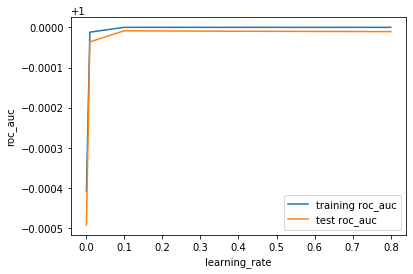

In [570]:
# plotting roc_auc with min_samples_split
plt.figure()
plt.plot(scores["param_learning_rate"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_learning_rate"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("learning_rate")
plt.ylabel("roc_auc")
plt.legend()
plt.show()

In [571]:
xgm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0001,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='hist', verbosity=1)

Optimal learning_rate=0.1

### Grid Search CV to find optimal parameters

In [179]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'gamma':[0.0001,0.001,0.01,0.1],
              'reg_alpha':[0.001,0.01,0.1,0.4]
             }

# instantiate the model
xgm = XGBClassifier(max_depth=14,learning_rate=0.1,n_estimators=100,tree_method='hist',random_state=100)


# fit tree on training data
xgm = GridSearchCV(xgm, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",n_jobs=-1,
                 return_train_score=True,verbose=10)
xgm.fit(X_train_res2, y_train_res2)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  38 out of  48 | elapsed:  4.0min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  43 out of  48 | elapsed:  4.6min remaining:   32.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  4.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=14, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     tree_method='hist', verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.0001, 0.001, 0.01, 0.1],
                         'reg_alpha': [0.001, 0.01, 0.1, 

In [180]:
# printing the optimal recall score and hyperparameters
print('We can get best roc_auc of',xgm.best_score_,'using',xgm.best_params_)

We can get best roc_auc of 0.9967166987200932 using {'gamma': 0.0001, 'reg_alpha': 0.4}


In [376]:
xgm4=XGBClassifier(max_depth=14,reg_alpha=0.4,gamma=0.0001,min_child_weight=1,learning_rate=0.1,
                   n_estimators=100,tree_method='hist',random_state=100)

In [377]:
xgm4.fit(X_train_res2,y_train_res2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0001,
              learning_rate=0.1, max_delta_step=0, max_depth=14,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0.4, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='hist', verbosity=1)

In [378]:
y_train_prob=xgm4.predict_proba(X_train_res2)[:,1]

In [379]:
xgm4_df=pd.DataFrame()
xgm4_df['Fraud']=y_train_res2
xgm4_df['Fraud_prob']=y_train_prob

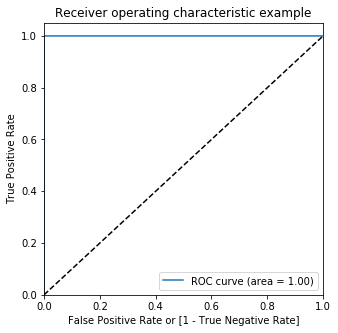

In [380]:
draw_roc(xgm4_df.Fraud, xgm4_df.Fraud_prob)

In [381]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    xgm4_df[i]= xgm4_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
xgm4_df.head()

,Fraud,Fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000044,1,0,0,0,0,0,0,0,0,0
1,0,0.000089,1,0,0,0,0,0,0,0,0,0
2,0,0.000045,1,0,0,0,0,0,0,0,0,0
3,0,0.000038,1,0,0,0,0,0,0,0,0,0
4,0,0.000539,1,0,0,0,0,0,0,0,0,0


In [382]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(xgm4_df.Fraud, xgm4_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

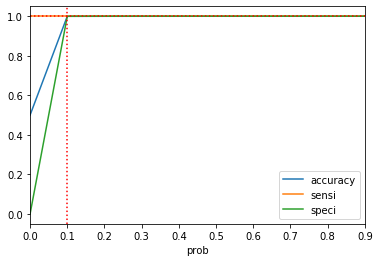

In [383]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.1,color='r',ls='dotted')
plt.axhline(y=1,color='r',ls='dotted')
plt.show()

In [384]:
p, r, thresholds = precision_recall_curve(xgm4_df.Fraud, xgm4_df.Fraud_prob)

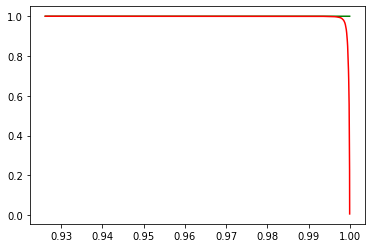

In [385]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [386]:
xgm4_df['Final_Pred']=xgm4_df.Fraud_prob.map( lambda x: 1 if x > 0.925 else 0)

In [387]:
cmf=metrics.confusion_matrix(xgm4_df['Fraud'],xgm4_df['Final_Pred'])

In [388]:
cmf

array([[199020,      0],
       [     0, 199044]], dtype=int64)

In [389]:
tr_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

### Predicting on Test Set

In [390]:
#Creating a DataFrame of the original target variable and Fraud Probability 
y_test_pred=xgm4.predict_proba(X_test)[:,1]
y_test_pred_final = pd.DataFrame({'Fraud':y_test.values, 'Fraud_prob':y_test_pred})

In [415]:
y_test_pred_final['Final_Pred'] = y_test_pred_final.Fraud_prob.map(lambda x: 1 if x > 0.925 else 0)

In [416]:
cmf=metrics.confusion_matrix(y_test_pred_final['Fraud'],y_test_pred_final['Final_Pred'])

In [417]:
cmf

array([[85278,    17],
       [   31,   117]], dtype=int64)

In [418]:
te_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

In [419]:
mr.loc['XGBoost with ADASYN','Training Accuracy']=metrics.accuracy_score(xgm4_df.Fraud,xgm4_df.Final_Pred)
mr.loc['XGBoost with ADASYN','Test Accuracy']=metrics.accuracy_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['XGBoost with ADASYN','Training Recall']=metrics.recall_score(xgm4_df.Fraud,xgm4_df.Final_Pred)
mr.loc['XGBoost with ADASYN','Test Recall']=metrics.recall_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['XGBoost with ADASYN','Training Precision']=metrics.precision_score(xgm4_df.Fraud,xgm4_df.Final_Pred)
mr.loc['XGBoost with ADASYN','Test Precision']=metrics.precision_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['XGBoost with ADASYN','Training f1_score']=metrics.f1_score(xgm4_df.Fraud,xgm4_df.Final_Pred)
mr.loc['XGBoost with ADASYN','Test f1_score']=metrics.f1_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['XGBoost with ADASYN','Training Specificity']=tr_sp
mr.loc['XGBoost with ADASYN','Test Specificity']=te_sp

In [420]:
mr

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision,Training Specificity,Test Specificity,Training f1_score,Test f1_score
Logistic Regression-l1 regularized with no sampling,0.999333,0.999111,0.811047,0.777027,0.804035,0.727848,0.999658,0.999496,0.807525,0.751634
Random Forest with no sampling,0.999318,0.999052,0.805233,0.763514,0.800578,0.710692,0.999653,0.999461,0.802899,0.736156
Decision Tree without Sampling,0.999318,0.998982,0.755814,0.682432,0.833333,0.716312,0.999739,0.999531,0.792683,0.698962
XGBoost with no sampling,0.999463,0.999263,0.851744,0.837838,0.839542,0.760736,0.999719,0.999543,0.845599,0.797428
Logistic Regression-l1 regularized with random over sampling,0.946900,0.948047,0.946493,0.912162,0.947264,0.029599,0.947307,0.948110,0.946878,0.057337
Random Forest with random over sampling,0.998364,0.999204,0.996865,0.655405,0.999864,0.850877,0.999864,0.999801,0.998362,0.740458
Decision Tree with Random Over Sampling,0.999689,0.999192,0.924419,0.797297,0.898305,0.751592,0.999819,0.999543,0.911175,0.773770
XGBoost with Random Over Sampling,1.000000,0.999520,1.000000,0.777027,1.000000,0.934959,1.000000,0.999906,1.000000,0.848708
Logistic Regression-l1 regularized with SMOTE,0.966938,0.966317,0.967968,0.885135,0.965978,0.043783,0.965908,0.966458,0.966972,0.083439
Random Forest with SMOTE,0.996362,0.991772,0.999578,0.864865,0.993190,0.157830,0.993146,0.991992,0.996374,0.266945


## Logistic Regression

In [421]:
#L1 regularized

logistic=LogisticRegression(penalty='l1',solver='liblinear')

# Create regularization hyperparameter list
C = [0.001,0.01,0.1,0.2,0.5,1,2,4,8]

# Create hyperparameter options
hyperparameters = dict(C=C)

In [422]:
lr4 = GridSearchCV(logistic, hyperparameters, cv=3, verbose=5,n_jobs=-1,scoring='roc_auc',return_train_score=True)
lr4.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed:   57.0s remaining:   28.4s
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:  1.4min remaining:   10.3s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.2, 0.5, 1, 2, 4, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=5)

In [423]:
#scores of GridSearchCV
scores = pd.DataFrame(lr4.cv_results_)

In [424]:
lr4.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

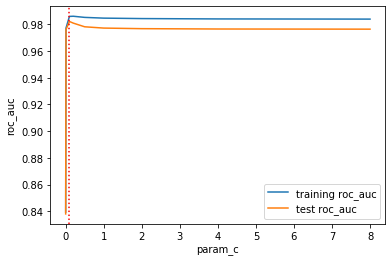

In [425]:
# plotting roc_auc_score with value of param_C for l1 regularization
plt.figure()
plt.plot(scores["param_C"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_C"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("param_c")
plt.ylabel("roc_auc")
plt.axvline(x=0.1,color='r',ls='dotted')
plt.legend()
plt.show()

In [426]:
lr4f=LogisticRegression(penalty='l1',C=0.1,solver='liblinear')
lr4f.fit(X_train_res2,y_train_res2)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [427]:
y_train_prob=lr4f.predict_proba(X_train_res2)[:,1]

In [428]:
lr4_df=pd.DataFrame()
lr4_df['Fraud']=y_train_res2
lr4_df['Fraud_prob']=y_train_prob

### ROC Curve

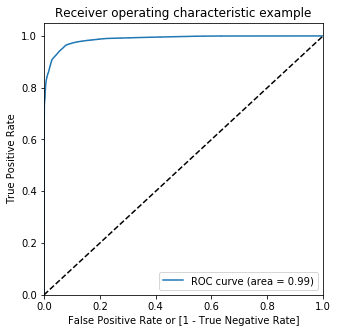

In [429]:
draw_roc(lr4_df.Fraud, lr4_df.Fraud_prob)

In [430]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    lr4_df[i]= lr4_df.Fraud_prob.map(lambda x: 1 if x > i else 0)
lr4_df.head()

,Fraud,Fraud_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.024464,1,0,0,0,0,0,0,0,0,0
1,0,0.051566,1,0,0,0,0,0,0,0,0,0
2,0,0.027833,1,0,0,0,0,0,0,0,0,0
3,0,0.034029,1,0,0,0,0,0,0,0,0,0
4,0,0.098056,1,0,0,0,0,0,0,0,0,0


In [433]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(lr4_df.Fraud, lr4_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

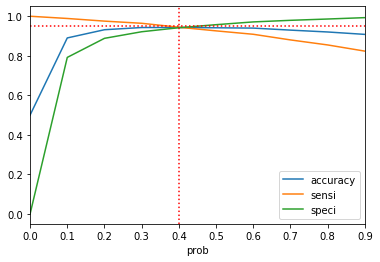

In [436]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.4,color='r',ls='dotted')
plt.axhline(y=0.95,color='r',ls='dotted')
plt.show()

In [437]:
p, r, thresholds = precision_recall_curve(lr4_df.Fraud, lr4_df.Fraud_prob)

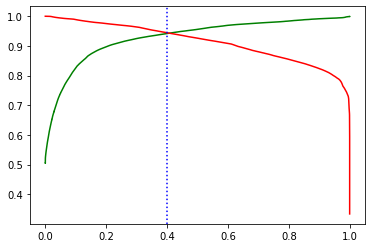

In [439]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.4,color='b',ls='dotted')
plt.show()

Therefore, we choose the threshold value as 0.4

In [618]:
lr4_df['Final_Pred']=lr4_df.Fraud_prob.map( lambda x: 1 if x > 0.4 else 0)

In [619]:
cmf=metrics.confusion_matrix(lr4_df['Fraud'],lr4_df['Final_Pred'])

In [620]:
cmf

array([[187472,  11548],
       [ 11085, 187959]], dtype=int64)

In [621]:
tr_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

### Predicting on Test Set

In [625]:
#Creating a DataFrame of the original target variable and Fraud Probability 
y_test_pred=lr4f.predict_proba(X_test)[:,1]
y_test_pred_final = pd.DataFrame({'Fraud':y_test.values, 'Fraud_prob':y_test_pred})

In [626]:
y_test_pred_final['Final_Pred'] = y_test_pred_final.Fraud_prob.map(lambda x: 1 if x > 0.4 else 0)

In [627]:
cmf=metrics.confusion_matrix(y_test_pred_final['Fraud'],y_test_pred_final['Final_Pred'])

In [628]:
cmf

array([[80430,  4865],
       [   13,   135]], dtype=int64)

In [629]:
te_sp=cmf[0,0]/(cmf[0,0]+cmf[0,1])

In [630]:
mr.loc['Logistic Regression-l1 regularized with ADASYN','Training Accuracy']=metrics.accuracy_score(lr4_df.Fraud,lr4_df.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with ADASYN','Test Accuracy']=metrics.accuracy_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with ADASYN','Training Recall']=metrics.recall_score(lr4_df.Fraud,lr4_df.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with ADASYN','Test Recall']=metrics.recall_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with ADASYN','Training Precision']=metrics.precision_score(lr4_df.Fraud,lr4_df.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with ADASYN','Test Precision']=metrics.precision_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with ADASYN','Training Specificity']=tr_sp
mr.loc['Logistic Regression-l1 regularized with ADASYN','Test Specificity']=te_sp
mr.loc['Logistic Regression-l1 regularized with ADASYN','Training f1_score']=metrics.f1_score(lr4_df.Fraud,lr4_df.Final_Pred)
mr.loc['Logistic Regression-l1 regularized with ADASYN','Test f1_score']=metrics.f1_score(y_test_pred_final.Fraud,y_test_pred_final.Final_Pred)

In [631]:
mr

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision,Training Specificity,Test Specificity,Training f1_score,Test f1_score
Logistic Regression-l1 regularized with no sampling,0.999333,0.999111,0.811047,0.777027,0.804035,0.727848,0.999658,0.999496,0.807525,0.751634
Random Forest with no sampling,0.999318,0.999052,0.805233,0.763514,0.800578,0.710692,0.999653,0.999461,0.802899,0.736156
Decision Tree without Sampling,0.999318,0.998982,0.755814,0.682432,0.833333,0.716312,0.999739,0.999531,0.792683,0.698962
XGBoost with no sampling,0.999463,0.999263,0.851744,0.837838,0.839542,0.760736,0.999719,0.999543,0.845599,0.797428
Logistic Regression-l1 regularized with random over sampling,0.946900,0.948047,0.946493,0.912162,0.947264,0.029599,0.947307,0.948110,0.946878,0.057337
Random Forest with random over sampling,0.998364,0.999204,0.996865,0.655405,0.999864,0.850877,0.999864,0.999801,0.998362,0.740458
Decision Tree with Random Over Sampling,0.999689,0.999192,0.924419,0.797297,0.898305,0.751592,0.999819,0.999543,0.911175,0.773770
XGBoost with Random Over Sampling,1.000000,0.999520,1.000000,0.777027,1.000000,0.934959,1.000000,0.999906,1.000000,0.848708
Logistic Regression-l1 regularized with SMOTE,0.966938,0.966317,0.967968,0.885135,0.965978,0.043783,0.965908,0.966458,0.966972,0.083439
Random Forest with SMOTE,0.996362,0.991772,0.999578,0.864865,0.993190,0.157830,0.993146,0.991992,0.996374,0.266945


In [453]:
mr.style.background_gradient(cmap='RdYlGn')

,Training Accuracy,Test Accuracy,Training Recall,Test Recall,Training Precision,Test Precision,Training Specificity,Test Specificity,Training f1_score,Test f1_score
Logistic Regression-l1 regularized with no sampling,0.999333,0.999111,0.811047,0.777027,0.804035,0.727848,0.999658,0.999496,0.807525,0.751634
Random Forest with no sampling,0.999318,0.999052,0.805233,0.763514,0.800578,0.710692,0.999653,0.999461,0.802899,0.736156
Decision Tree without Sampling,0.999318,0.998982,0.755814,0.682432,0.833333,0.716312,0.999739,0.999531,0.792683,0.698962
XGBoost with no sampling,0.999463,0.999263,0.851744,0.837838,0.839542,0.760736,0.999719,0.999543,0.845599,0.797428
Logistic Regression-l1 regularized with random over sampling,0.9469,0.948047,0.946493,0.912162,0.947264,0.0295988,0.947307,0.94811,0.946878,0.057337
Random Forest with random over sampling,0.998364,0.999204,0.996865,0.655405,0.999864,0.850877,0.999864,0.999801,0.998362,0.740458
Decision Tree with Random Over Sampling,0.999689,0.999192,0.924419,0.797297,0.898305,0.751592,0.999819,0.999543,0.911175,0.77377
XGBoost with Random Over Sampling,1,0.99952,1,0.777027,1,0.934959,1,0.999906,1,0.848708
Logistic Regression-l1 regularized with SMOTE,0.966938,0.966317,0.967968,0.885135,0.965978,0.0437834,0.965908,0.966458,0.966972,0.0834395
Random Forest with SMOTE,0.996362,0.991772,0.999578,0.864865,0.99319,0.15783,0.993146,0.991992,0.996374,0.266945


Our best model is XGBoost with no sampling because it has minimal overfitting, highest recall and good precision values as well.

Therefore, the final predictions are:

In [633]:
#Creating a DataFrame of the original target variable and Fraud Probability 
y_test_pred=xgm1.predict_proba(X_test)[:,1]
y_test_pred_final = pd.DataFrame({'Fraud':y_test.values, 'Fraud_prob':y_test_pred})

In [634]:
y_test_pred_final['Final_Pred'] = y_test_pred_final.Fraud_prob.map(lambda x: 1 if x > 0.12 else 0)

Training Recall: 0.8517

Test Recall: 0.8378

Training Precision: 0.8395

Test Precision: 0.7607

# Reasoning behind choosing balanced Precision and Recall:

The company "Wordline" having a global presence of over 11000 employees has a large customer base. Low precision values lead to higher costs in due to amount of resources (time, infrastructure and people) involved. Hence, the balanced model is chosen for this project.
<br>
<br>
However, it is suggested to use automated calling system in future to warn the customer regarding fraud. This shall remove the unnecessary cost burden and open a possibility to choose a model with high recall and low precision, consequently improving the prediction of actual fraud cases.